In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [3]:
df=pd.read_csv('https://raw.githubusercontent.com/FlipRoboTechnologies/ML-Datasets/main/Bank%20Marketing/termdeposit_train.csv')

In [4]:
df

ID  age         job   marital  education default  balance housing  \
0      26110   56      admin.   married    unknown      no     1933      no   
1      40576   31     unknown   married  secondary      no        3      no   
2      15320   27    services   married  secondary      no      891     yes   
3      43962   57  management  divorced   tertiary      no     3287      no   
4      29842   31  technician   married  secondary      no      119     yes   
...      ...  ...         ...       ...        ...     ...      ...     ...   
31642  36483   29  management    single   tertiary      no        0     yes   
31643  40178   53  management  divorced   tertiary      no      380      no   
31644  19710   32  management    single   tertiary      no      312      no   
31645  38556   57  technician   married  secondary      no      225     yes   
31646  14156   55  management  divorced  secondary      no      204     yes   

      loan    contact  day month  duration  campaign  pdays  previous  \
0       no  telephone   19   nov        44         2     -1         0   
1       no   cellular   20   jul        91         2     -1         0   
2       no   cellular   18   jul       240         1     -1         0   
3       no   cellular   22   jun       867         1     84         3   
4       no   cellular    4   feb       380         1     -1         0   
...    ...        ...  ...   ...       ...       ...    ...       ...   
31642   no   cellular   12   may       116         2     -1         0   
31643  yes   cellular    5   jun       438         2     -1         0   
31644   no   cellular    7   aug        37         3     -1         0   
31645   no  telephone   15   may        22         7    337        12   
31646   no   cellular   11   jul      1973         2     -1         0   

      poutcome subscribed  
0      unknown         no  
1      unknown         no  
2      unknown         no  
3      success        yes  
4      unknown         no  
...        ...        ...  
31642  unknown         no  
31643  unknown        yes  
31644  unknown         no  
31645  failure         no  
31646  unknown        yes  

[31647 rows x 18 columns]

From above we can see Total number of rows and columns of the dataset.
This dataset contains the details of customers in which both numerical and categorical data are present.here the 'subscribed' is the target variable which contains 2 categories so it will be termed as classification problem where we need to predict several subcribers using classification models

# Exploratory Data Analysis

In [5]:
df.shape

(31647, 18)

This shows there are 31647 rows and 18 columns

In [6]:
df.columns

Index(['ID', 'age', 'job', 'marital', 'education', 'default', 'balance',
       'housing', 'loan', 'contact', 'day', 'month', 'duration', 'campaign',
       'pdays', 'previous', 'poutcome', 'subscribed'],
      dtype='object')

above is the list of the column in the dataset

In [7]:
df.dtypes

ID             int64
age            int64
job           object
marital       object
education     object
default       object
balance        int64
housing       object
loan          object
contact       object
day            int64
month         object
duration       int64
campaign       int64
pdays          int64
previous       int64
poutcome      object
subscribed    object
dtype: object

above we can see the columns and the datatypes of each columns

In [8]:
df.isnull().sum()

ID            0
age           0
job           0
marital       0
education     0
default       0
balance       0
housing       0
loan          0
contact       0
day           0
month         0
duration      0
campaign      0
pdays         0
previous      0
poutcome      0
subscribed    0
dtype: int64

In [10]:
df.isnull().sum().sum()

0

from the Two code above we can see that ther is no Null values in the dataset

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31647 entries, 0 to 31646
Data columns (total 18 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   ID          31647 non-null  int64 
 1   age         31647 non-null  int64 
 2   job         31647 non-null  object
 3   marital     31647 non-null  object
 4   education   31647 non-null  object
 5   default     31647 non-null  object
 6   balance     31647 non-null  int64 
 7   housing     31647 non-null  object
 8   loan        31647 non-null  object
 9   contact     31647 non-null  object
 10  day         31647 non-null  int64 
 11  month       31647 non-null  object
 12  duration    31647 non-null  int64 
 13  campaign    31647 non-null  int64 
 14  pdays       31647 non-null  int64 
 15  previous    31647 non-null  int64 
 16  poutcome    31647 non-null  object
 17  subscribed  31647 non-null  object
dtypes: int64(8), object(10)
memory usage: 4.3+ MB


This gives the information about the dataset and we can see rhat all columns have no missing values. 

<Axes: >

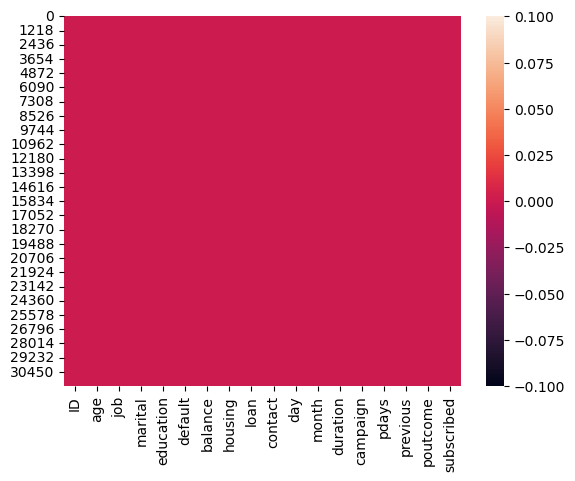

In [13]:
sns.heatmap(df.isnull())

we can clearly visualise that there is no missing data

In [14]:
for i in df.columns:
    print(df[i].value_counts())
    print('\n')

26110    1
13339    1
39681    1
15135    1
26037    1
        ..
1247     1
15584    1
25376    1
38699    1
14156    1
Name: ID, Length: 31647, dtype: int64


32    1457
31    1417
33    1406
34    1321
35    1314
      ... 
92       1
95       1
93       1
94       1
90       1
Name: age, Length: 76, dtype: int64


blue-collar      6842
management       6639
technician       5307
admin.           3631
services         2903
retired          1574
self-employed    1123
entrepreneur     1008
unemployed        905
housemaid         874
student           635
unknown           206
Name: job, dtype: int64


married     19095
single       8922
divorced     3630
Name: marital, dtype: int64


secondary    16224
tertiary      9301
primary       4808
unknown       1314
Name: education, dtype: int64


no     31062
yes      585
Name: default, dtype: int64


 0        2470
 1         137
 2         109
 4          95
 3          88
          ... 
 15120       1
-713         1
-905         1
 4722  

we can see that there are two class present in our target variable and as such it is a binary classification problem.
we can also see that there are no blank spaces in any of the coulmns.
we can also see that the ID column has the same number as the total number of rows which means it is unique to each rows and as such we can either drop it or make it our index column

In [15]:
df.set_index('ID', inplace=True)

In [16]:
df.shape

(31647, 17)

In [17]:
df.head(10)

age          job   marital  education default  balance housing loan  \
ID                                                                           
26110   56       admin.   married    unknown      no     1933      no   no   
40576   31      unknown   married  secondary      no        3      no   no   
15320   27     services   married  secondary      no      891     yes   no   
43962   57   management  divorced   tertiary      no     3287      no   no   
29842   31   technician   married  secondary      no      119     yes   no   
29390   33   management    single   tertiary      no        0     yes   no   
40444   56      retired   married  secondary      no     1044      no   no   
40194   50   technician    single  secondary      no     1811      no   no   
29824   45  blue-collar  divorced  secondary      no     1951     yes   no   
44676   35       admin.   married  secondary      no     1204      no   no   

         contact  day month  duration  campaign  pdays  previous poutcome  \
ID                                                                          
26110  telephone   19   nov        44         2     -1         0  unknown   
40576   cellular   20   jul        91         2     -1         0  unknown   
15320   cellular   18   jul       240         1     -1         0  unknown   
43962   cellular   22   jun       867         1     84         3  success   
29842   cellular    4   feb       380         1     -1         0  unknown   
29390   cellular    2   feb       116         3     -1         0  unknown   
40444  telephone    3   jul       353         2     -1         0  unknown   
40194   cellular    8   jun        97         4     -1         0  unknown   
29824   cellular    4   feb       692         1     -1         0  unknown   
44676   cellular    3   sep       789         2     -1         0  unknown   

      subscribed  
ID                
26110         no  
40576         no  
15320         no  
43962        yes  
29842         no  
29390         no  
40444        yes  
40194         no  
29824         no  
44676         no

# separating numerical and categorical data

In [18]:
categorical_col=[]
for i in df.dtypes.index:
    if df.dtypes[i]=='object':
        categorical_col.append(i)
print('categorical columns:', categorical_col)
print('\n')

categorical columns: ['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'poutcome', 'subscribed']




In [19]:
numerical_col=[]
for i in df.dtypes.index:
    if df.dtypes[i]!='object':
        numerical_col.append(i)
print('numerical columns:', numerical_col)
print('\n')

numerical columns: ['age', 'balance', 'day', 'duration', 'campaign', 'pdays', 'previous']




In [20]:
df.nunique().to_frame('No of unique value')

No of unique value
age                         76
job                         12
marital                      3
education                    4
default                      2
balance                   6326
housing                      2
loan                         2
contact                      3
day                         31
month                       12
duration                  1454
campaign                    45
pdays                      509
previous                    38
poutcome                     4
subscribed                   2

These are the unique value present in the dataset. 

In [21]:
df['subscribed'].value_counts()

no     27932
yes     3715
Name: subscribed, dtype: int64

we can assume that 'No' stand for customer who have not subscribed and 'yes' stand for customer who have subcribed there is also a case of class imbalance here

# Description of Dataset

In [22]:
df.describe()

age        balance           day      duration      campaign  \
count  31647.000000   31647.000000  31647.000000  31647.000000  31647.000000   
mean      40.957247    1363.890258     15.835466    258.113534      2.765697   
std       10.625134    3028.304293      8.337097    257.118973      3.113830   
min       18.000000   -8019.000000      1.000000      0.000000      1.000000   
25%       33.000000      73.000000      8.000000    104.000000      1.000000   
50%       39.000000     450.000000     16.000000    180.000000      2.000000   
75%       48.000000    1431.000000     21.000000    318.500000      3.000000   
max       95.000000  102127.000000     31.000000   4918.000000     63.000000   

              pdays      previous  
count  31647.000000  31647.000000  
mean      39.576042      0.574272  
std       99.317592      2.422529  
min       -1.000000      0.000000  
25%       -1.000000      0.000000  
50%       -1.000000      0.000000  
75%       -1.000000      0.000000  
max      871.000000    275.000000

This give statistical information of the numerical columns. the summary looks perfect since there is invalid present
the following can be observed from the above;
1) the counts of all the columns are same which means there are no missing values.
2)The standard deviation is high in all the columns which means this columns are not normally distributed except in colum campign and previous.
3)the mean is greater than the median in column Balance, duration,pdays and previous which means the columns are skewed to the right.
4) there is huge differnce between the Max and the 75% which means there is outliers present in the dataset.

In [33]:
print('Total Duplicate rows',df.duplicated().sum())

Total Duplicate rows 0


there is no duplicate rows in the dataset

# Data Visualization

no     27932
yes     3715
Name: subscribed, dtype: int64


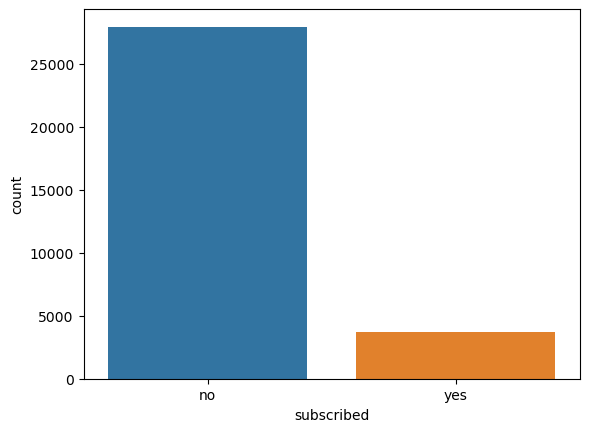

In [23]:
ax=sns.countplot(x='subscribed',data=df)
print(df['subscribed'].value_counts())

we can observed that there are less people who have subscribed to fixed term deposit.
this also lead to class imbalance.

married     19095
single       8922
divorced     3630
Name: marital, dtype: int64


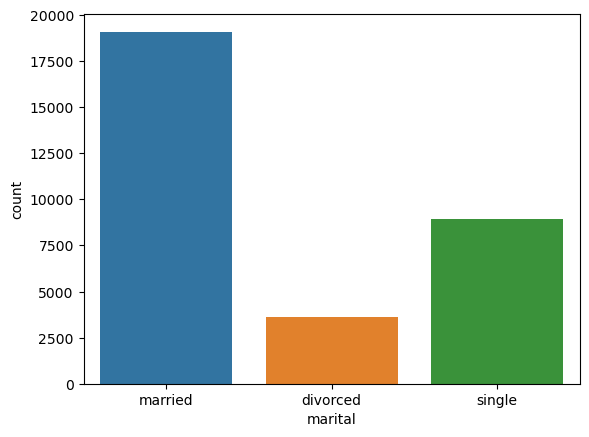

In [24]:
print(df['marital'].value_counts())
ax=sns.countplot(x='marital',data=df)
plt.show()

we can see that the dataset have more people who have married and lesser number of divorced customers

secondary    16224
tertiary      9301
primary       4808
unknown       1314
Name: education, dtype: int64


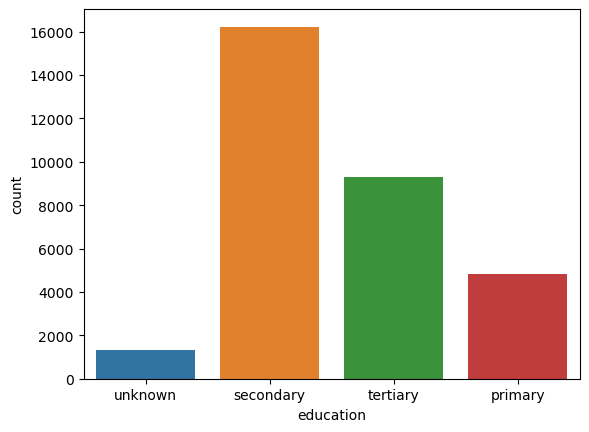

In [25]:
print(df['education'].value_counts())
ax=sns.countplot(x='education',data=df)
plt.show()

This shows that customer with secondary education are more than teriary and tertiary more than primary
and those customer whose education are unknown are the least

no     31062
yes      585
Name: default, dtype: int64


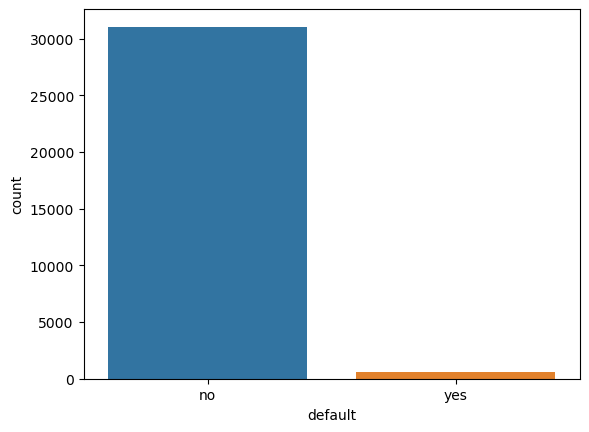

In [26]:
print(df['default'].value_counts())
ax=sns.countplot(x='default',data=df)
plt.show()

this shows that those who do not have credit in default are more than those who are in default.

yes    17584
no     14063
Name: housing, dtype: int64


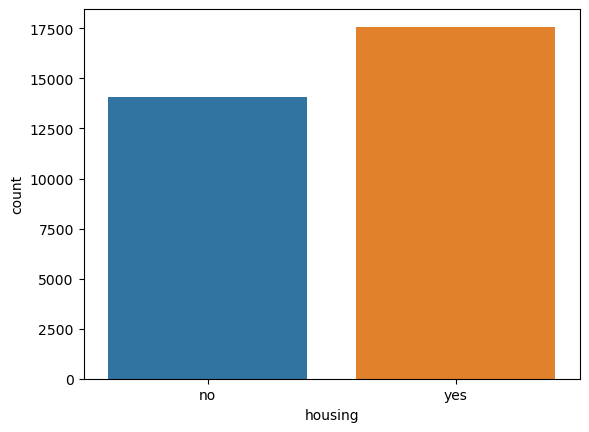

In [27]:
print(df['housing'].value_counts())
ax=sns.countplot(x='housing',data=df)
plt.show()

this shows that majority of the customer have housing loan. also significant number of people do not have a housing loan.

no     26516
yes     5131
Name: loan, dtype: int64


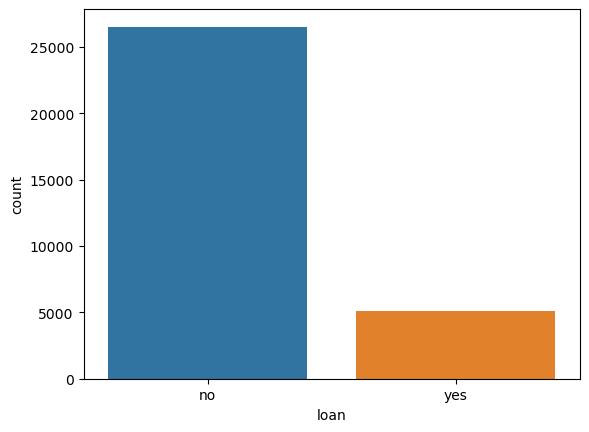

In [28]:
print(df['loan'].value_counts())
ax=sns.countplot(x='loan',data=df)
plt.show()

This shows that majority of the customer are don't have a loan. 

cellular     20423
unknown       9177
telephone     2047
Name: contact, dtype: int64


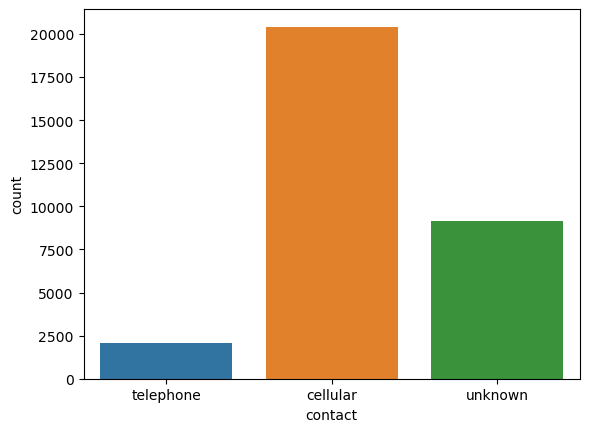

In [29]:
print(df['contact'].value_counts())
ax=sns.countplot(x='contact',data=df)
plt.show()

this shows that majority of the customer uses cellular contact and also a significant number of customer
customers is unknown

blue-collar      6842
management       6639
technician       5307
admin.           3631
services         2903
retired          1574
self-employed    1123
entrepreneur     1008
unemployed        905
housemaid         874
student           635
unknown           206
Name: job, dtype: int64


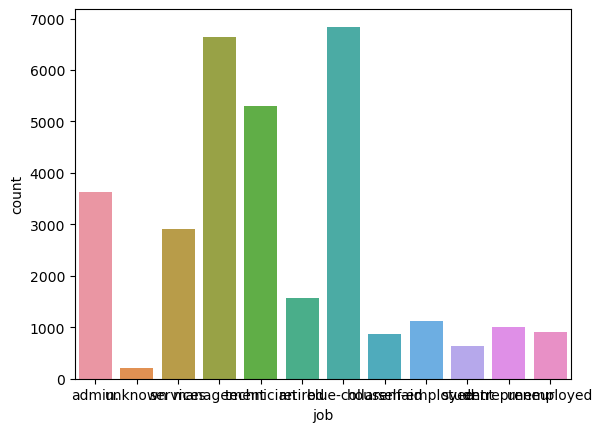

In [30]:
print(df['job'].value_counts())
ax=sns.countplot(x='job',data=df)
plt.show()

this shows the kind of employment the customer are in 
most customer are in blue collar job with little differnce when compare to Management roles

unknown    25929
failure     3362
other       1288
success     1068
Name: poutcome, dtype: int64


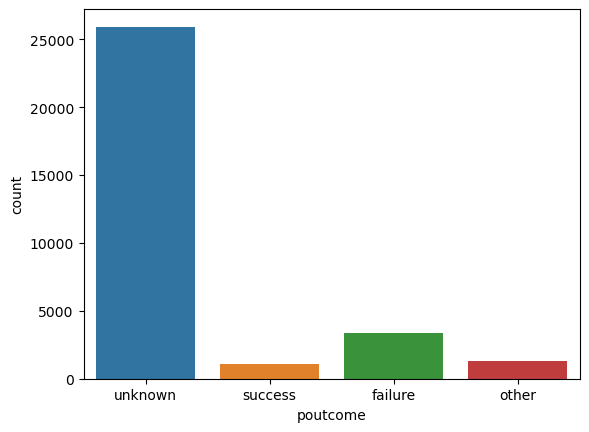

In [31]:
print(df['poutcome'].value_counts())
ax=sns.countplot(x='poutcome',data=df)
plt.show()

this shows the outcome of the previous marketing campaign

may    9669
jul    4844
aug    4333
jun    3738
nov    2783
apr    2055
feb    1827
jan     977
oct     512
sep     410
mar     342
dec     157
Name: month, dtype: int64


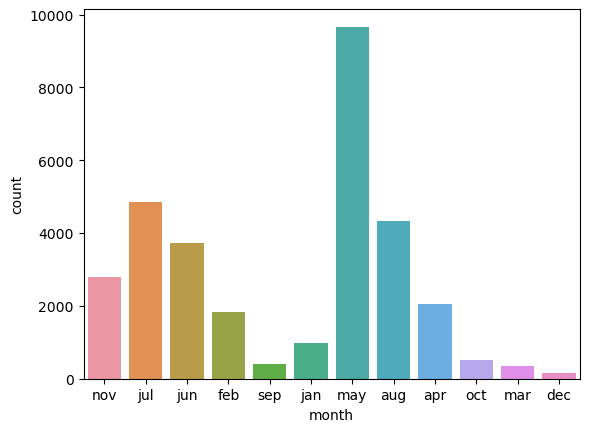

In [32]:
print(df['month'].value_counts())
ax=sns.countplot(x='month',data=df)
plt.show()

this shows that most customer were contacted in may, and least number of customers were contacted in dec

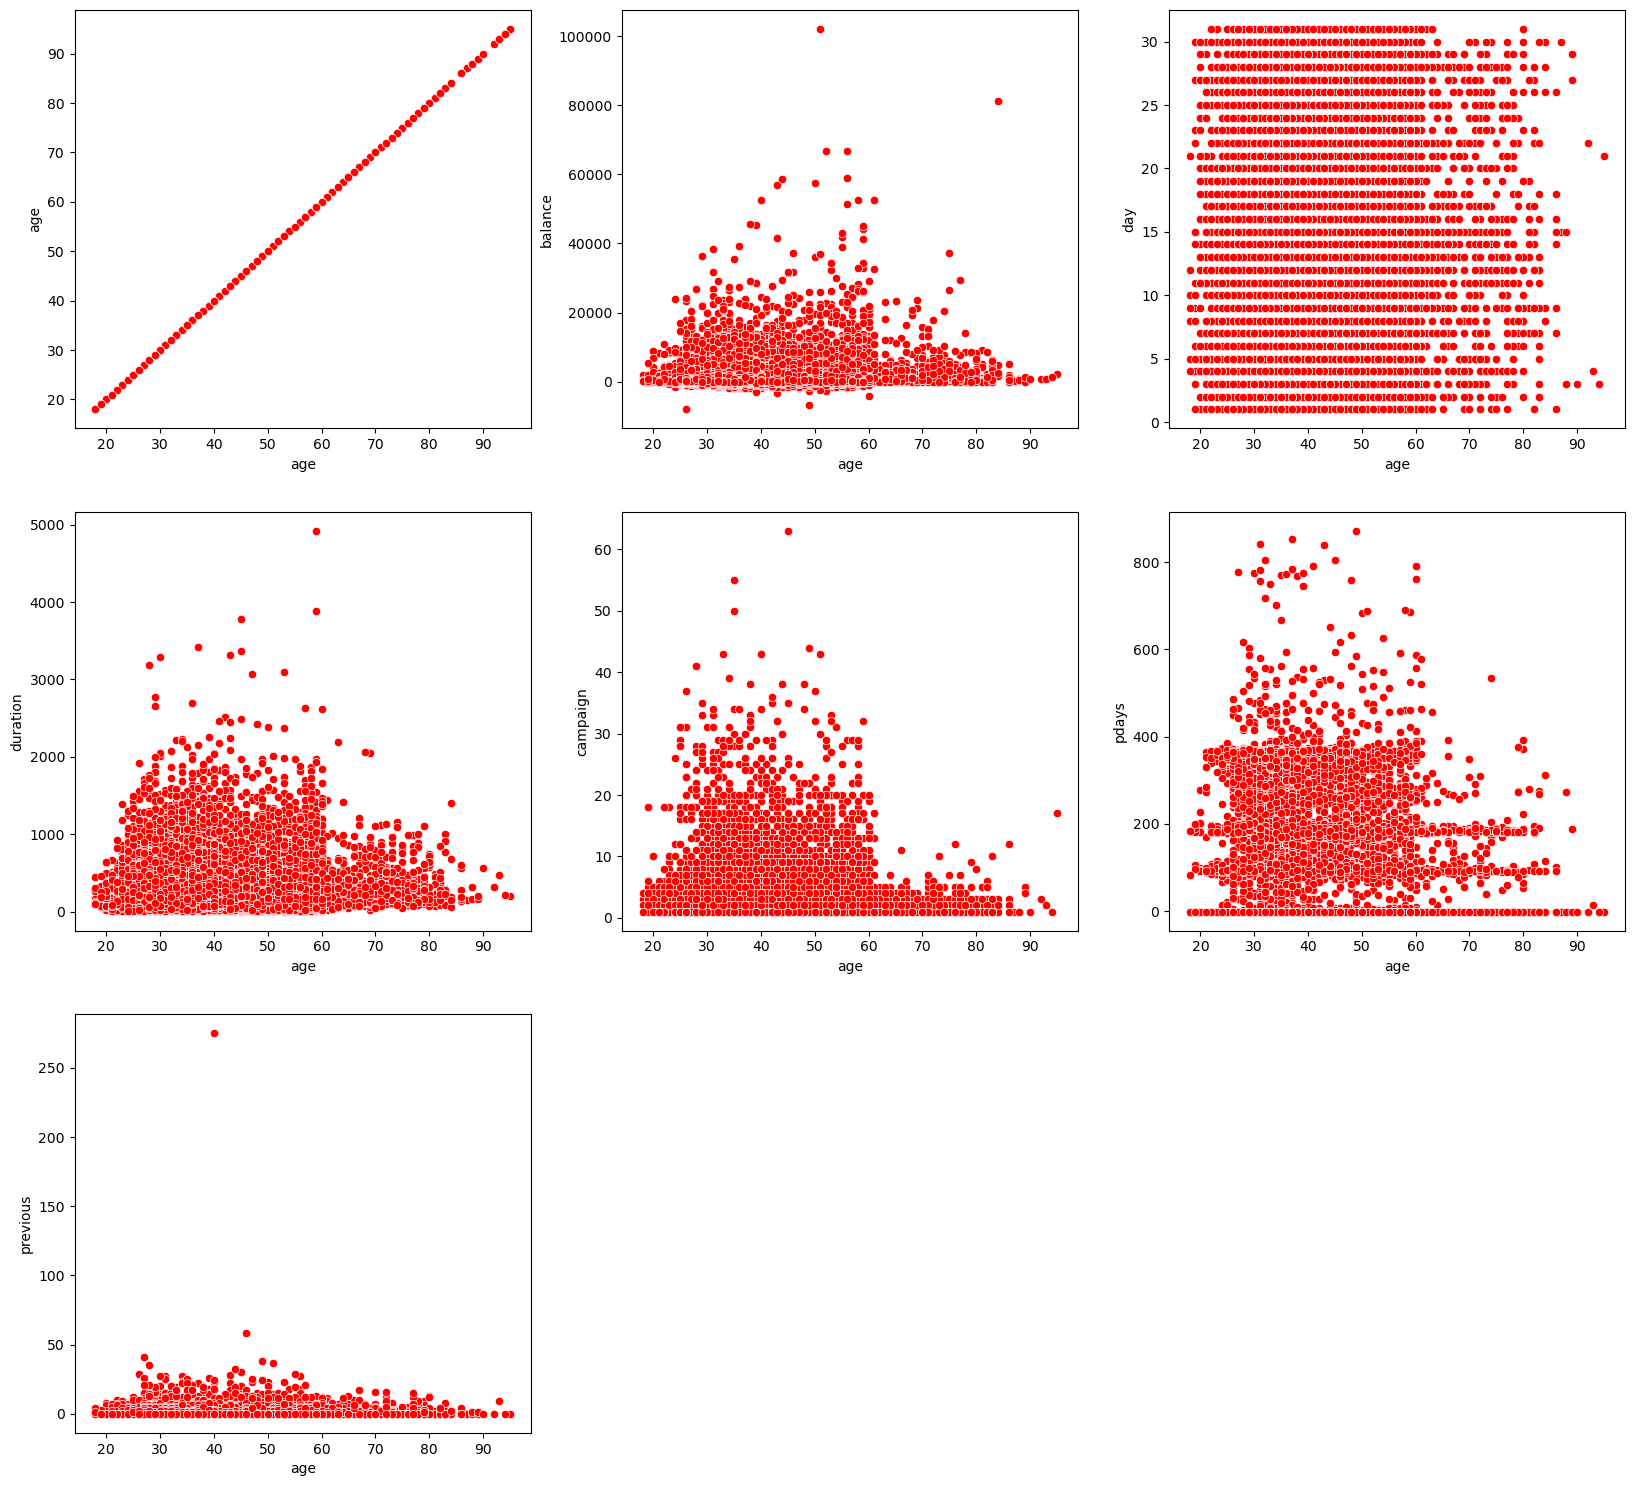

In [34]:
plt.figure(figsize=(20,25))
p=1
for i in numerical_col:
    if p<=17:
        plt.subplot(4,3,p)
        sns.scatterplot(x='age',y=i,data=df,color='r')
        plt.xlabel('age')
        plt.ylabel(i)
    p+=1
plt.show()

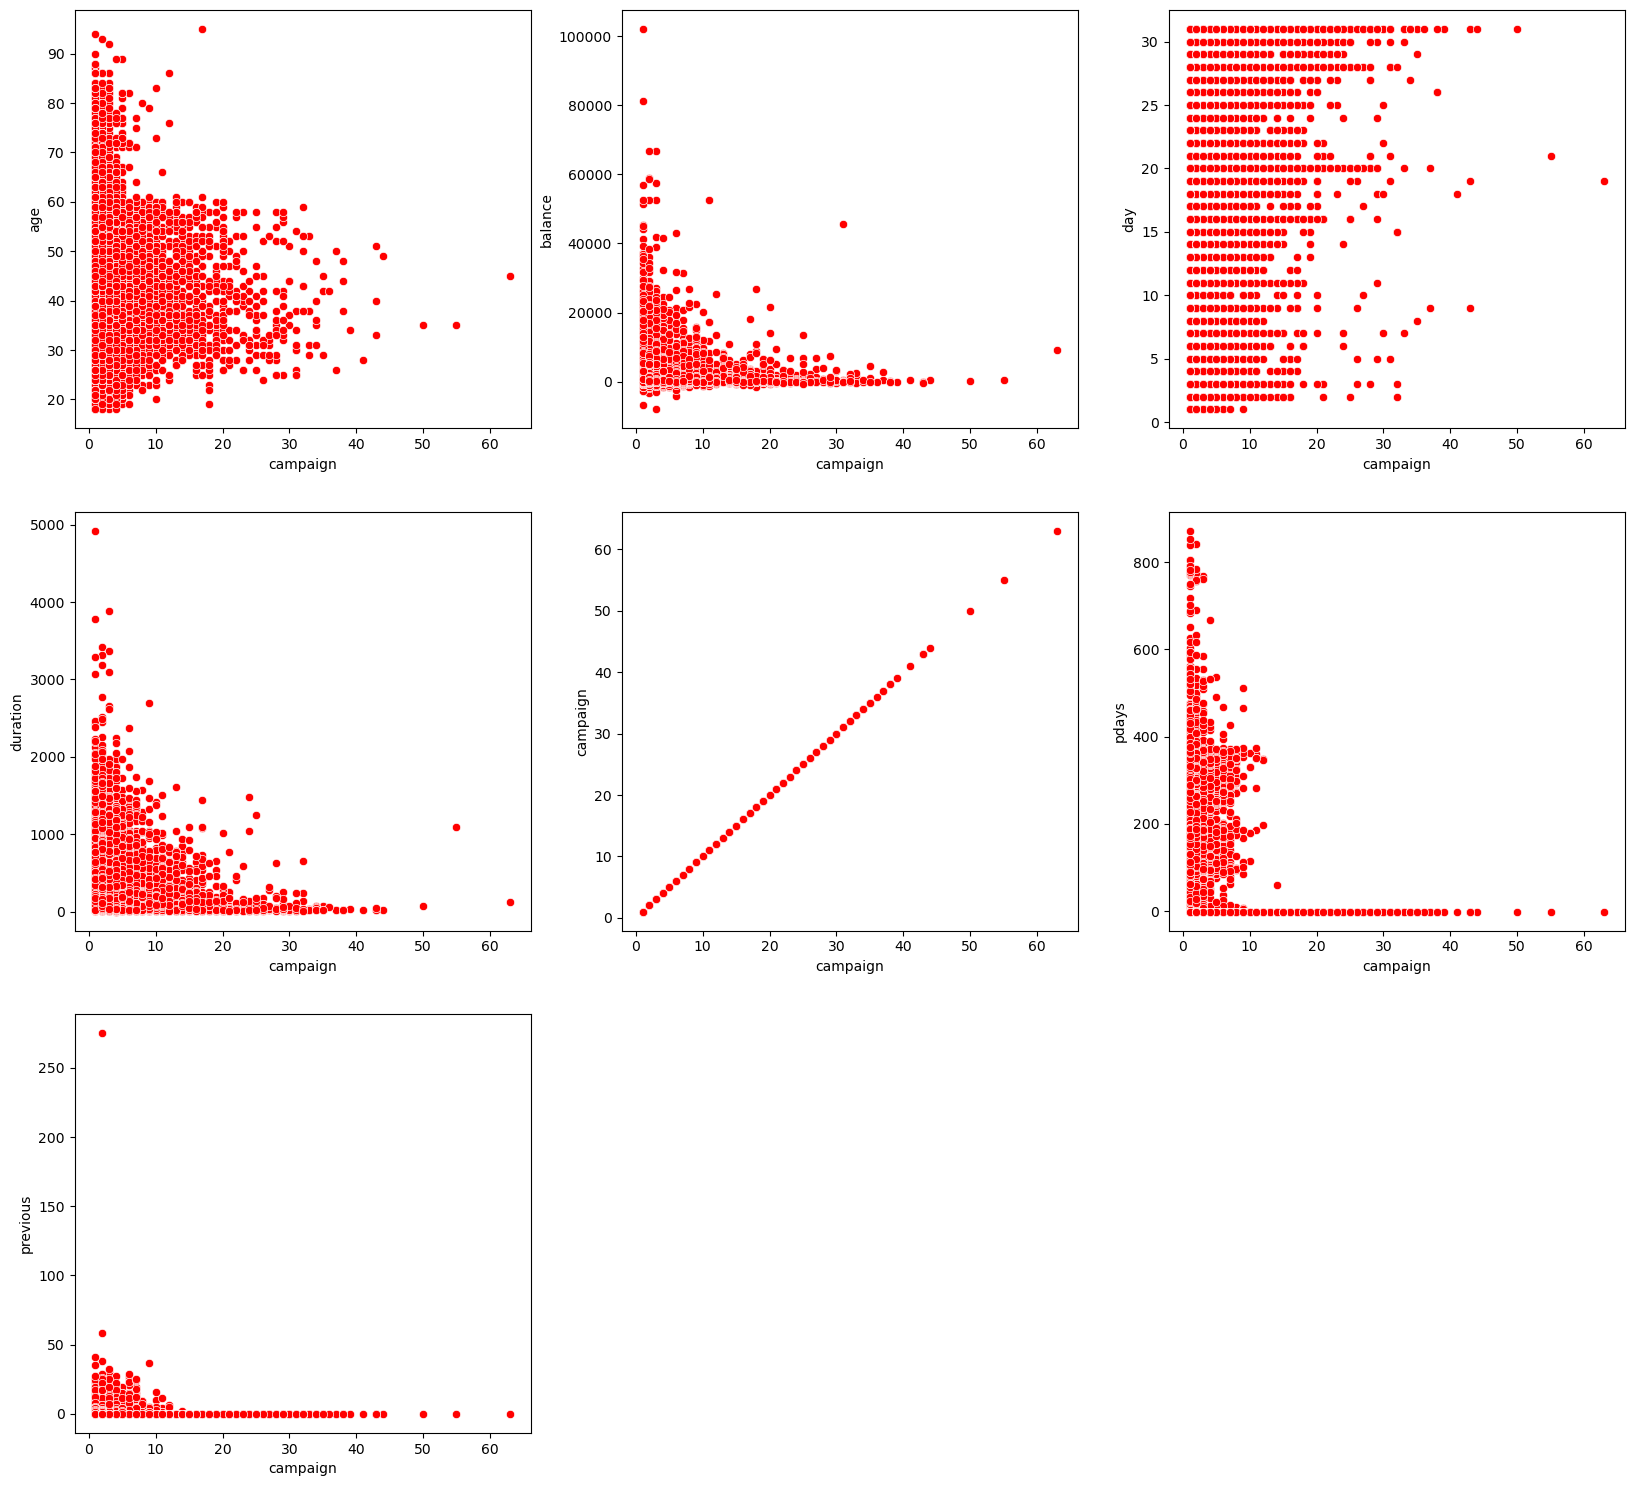

In [36]:
plt.figure(figsize=(20,25))
p=1
for i in numerical_col:
    if p<=17:
        plt.subplot(4,3,p)
        sns.scatterplot(x='campaign',y=i,data=df,color='r')
        plt.xlabel('campaign')
        plt.ylabel(i)
    p+=1
plt.show()

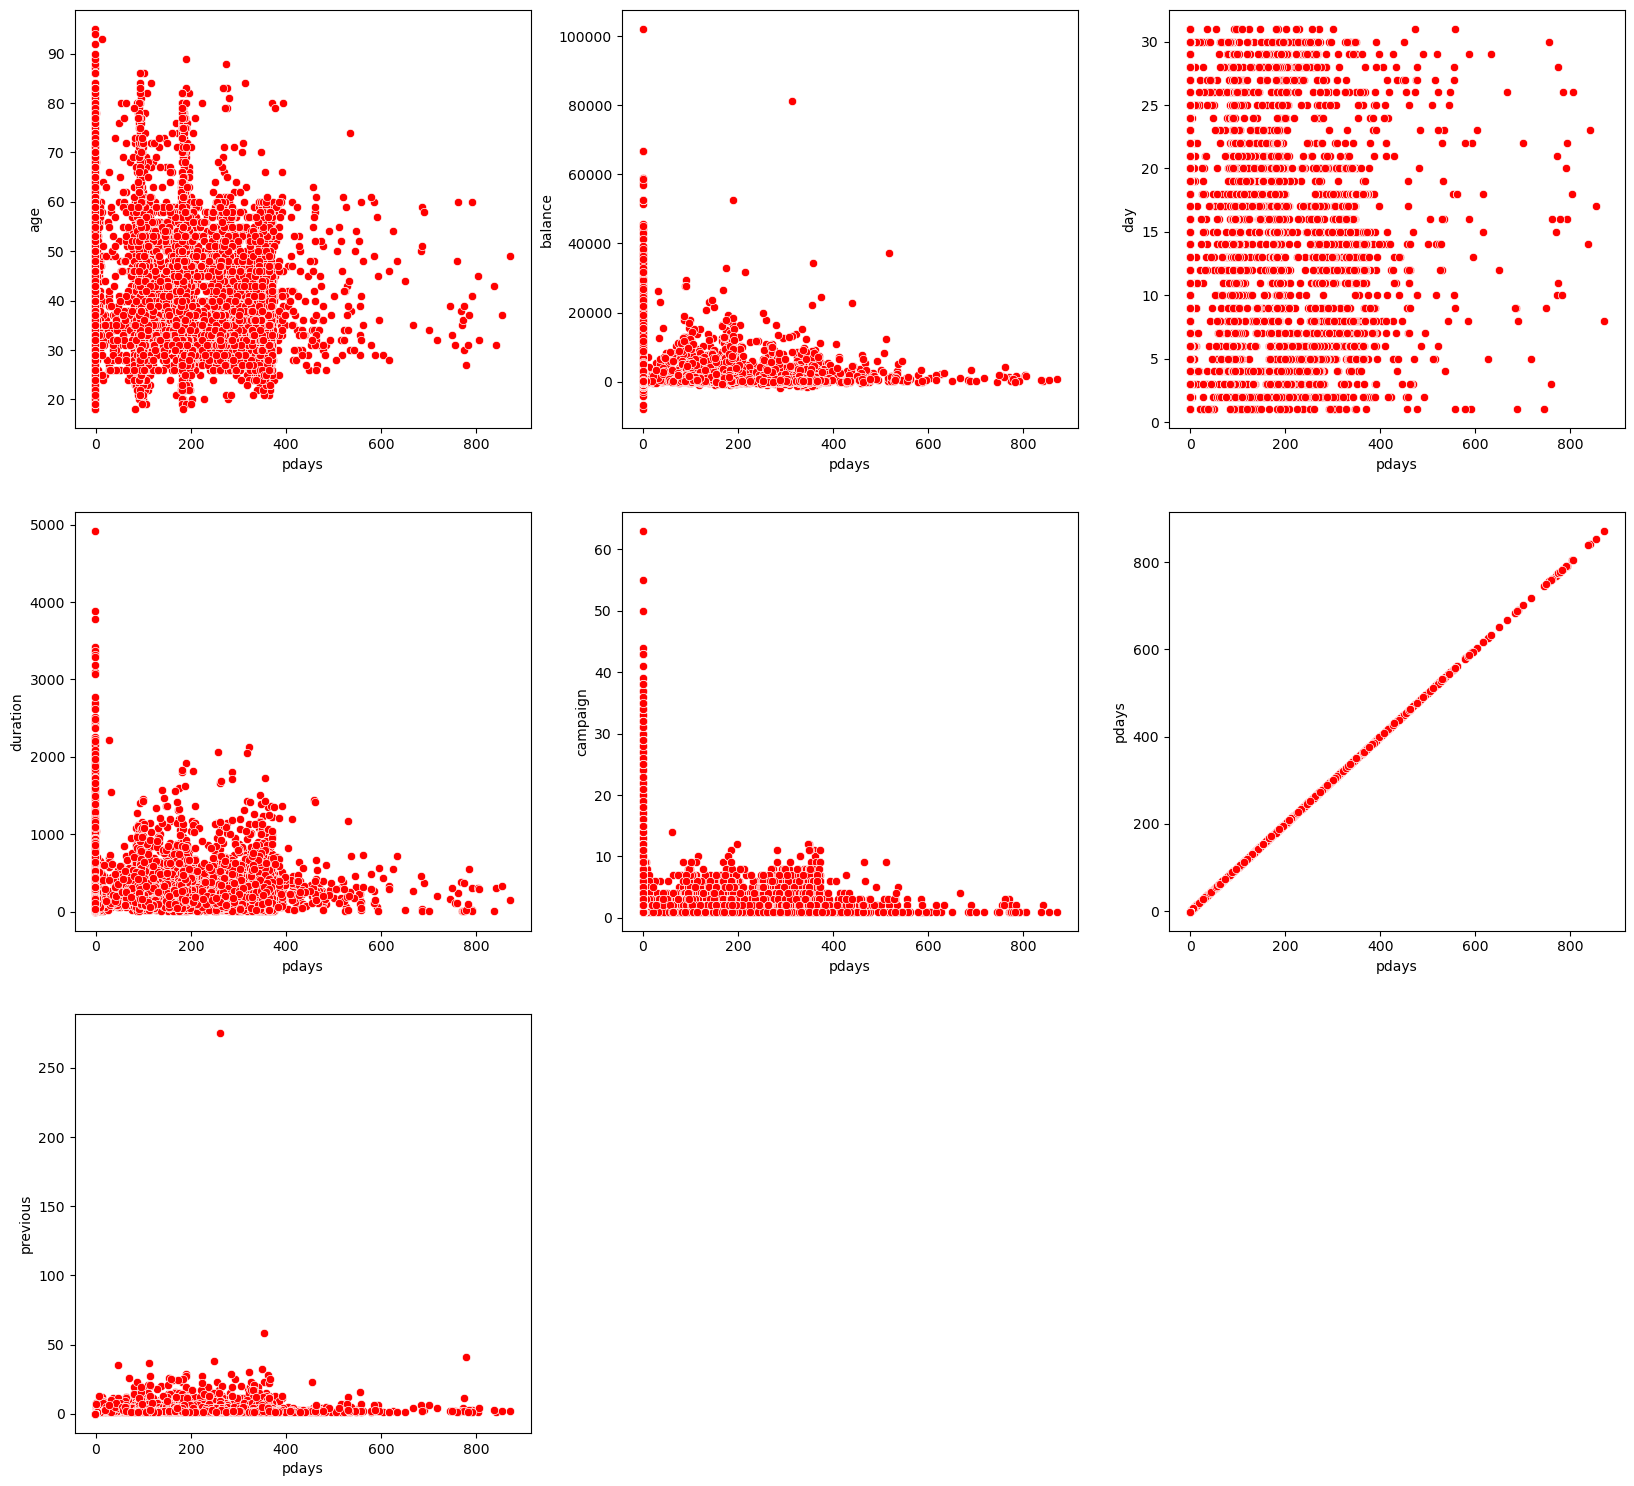

In [37]:
plt.figure(figsize=(20,25))
p=1
for i in numerical_col:
    if p<=17:
        plt.subplot(4,3,p)
        sns.scatterplot(x='pdays',y=i,data=df,color='r')
        plt.xlabel('pdays')
        plt.ylabel(i)
    p+=1
plt.show()

from the scatterplot above there is no difinite relationship between the numerical data

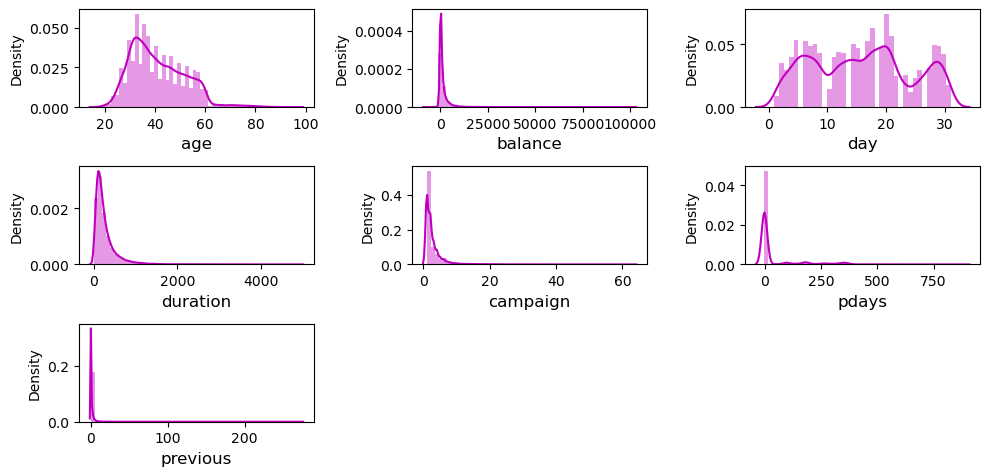

In [38]:
plt.figure(figsize=(10,6),facecolor='white')
plotnumber =1
for col in numerical_col:
    if plotnumber<=12:
        ax=plt.subplot(4,3,plotnumber) 
        sns.distplot(df[col],color='m')
        plt.xlabel(col,fontsize=12)
        plt.yticks(rotation=0,fontsize=10)
    plotnumber +=1
plt.tight_layout()

from above distribution plot we can see the right skewness in all the numerical columns.

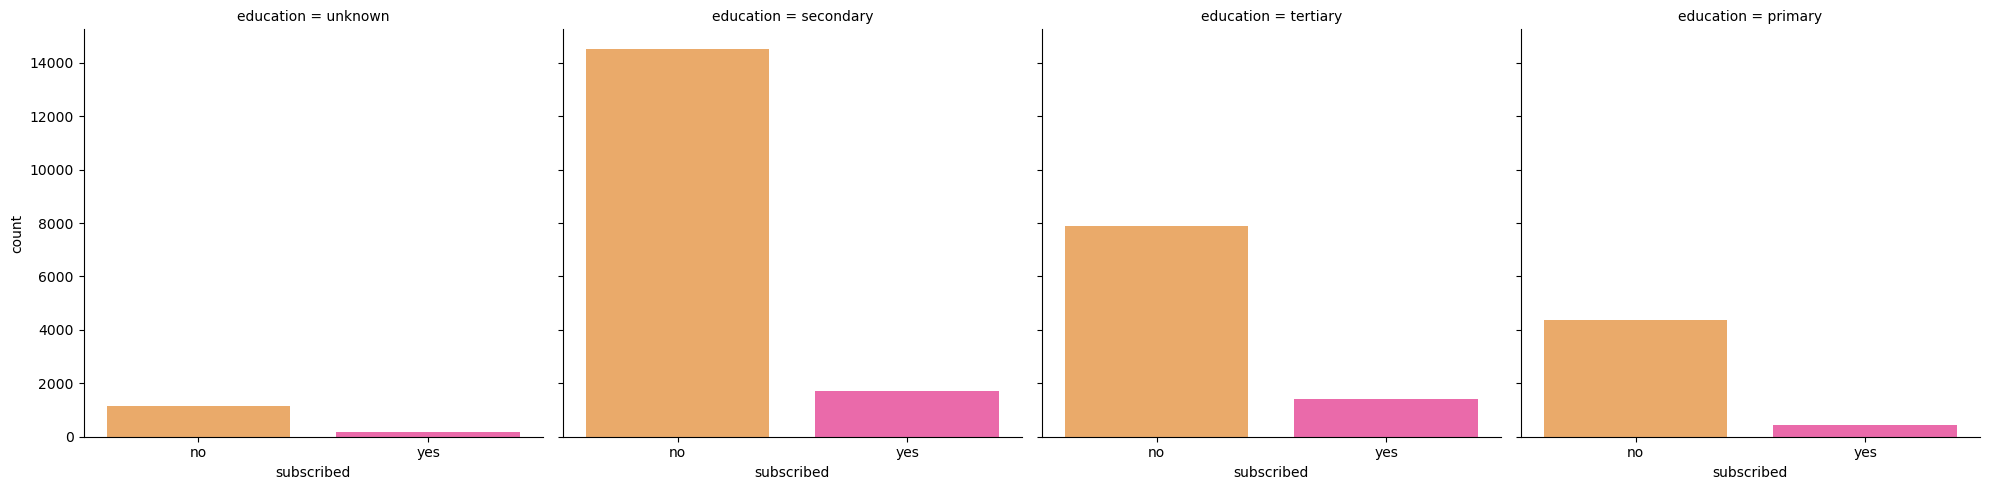

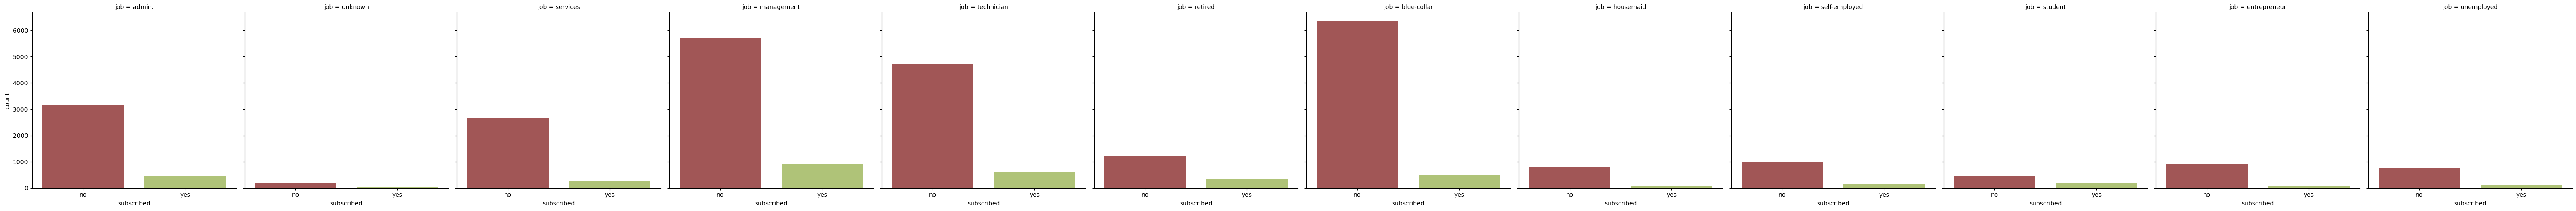

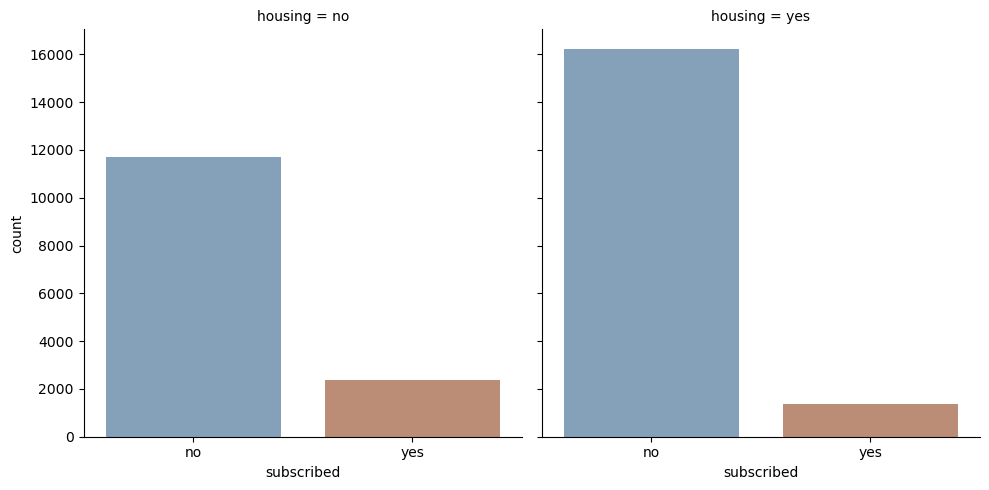

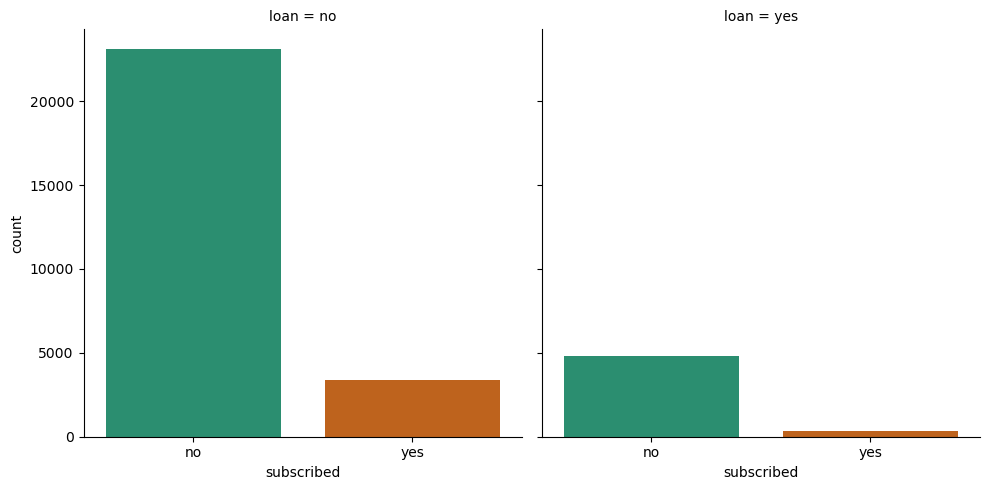

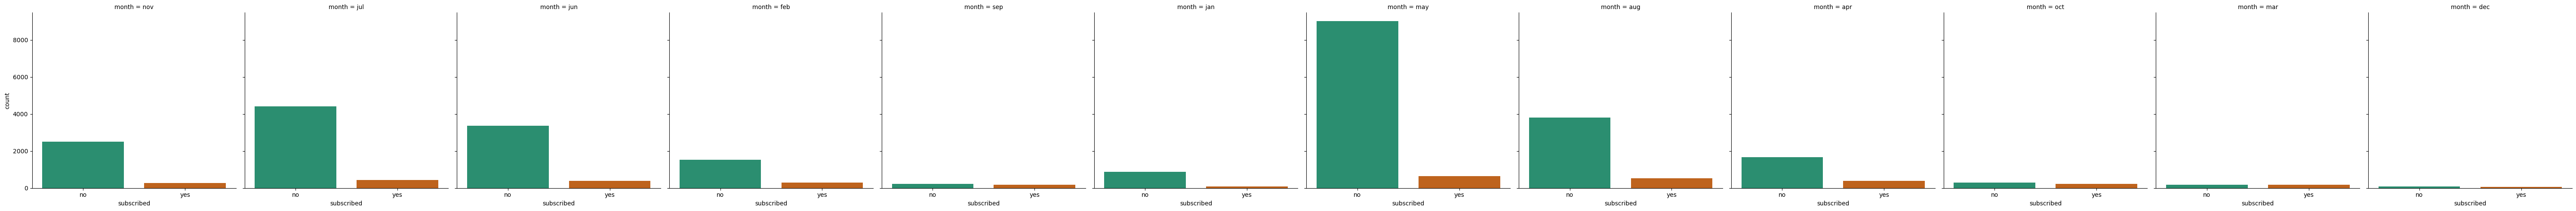

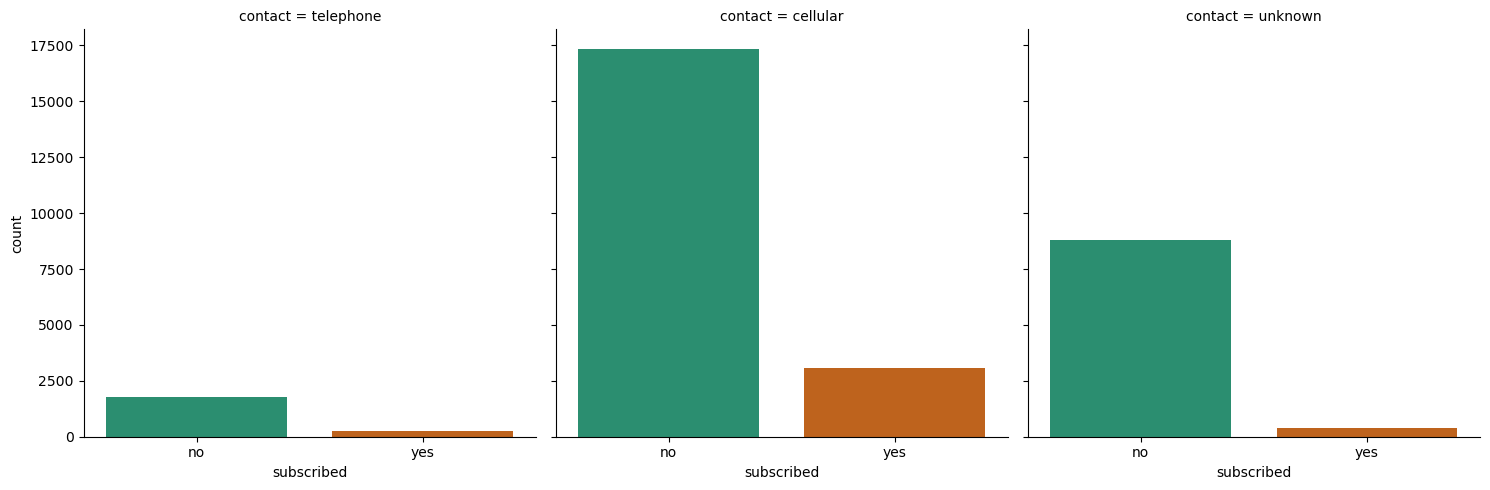

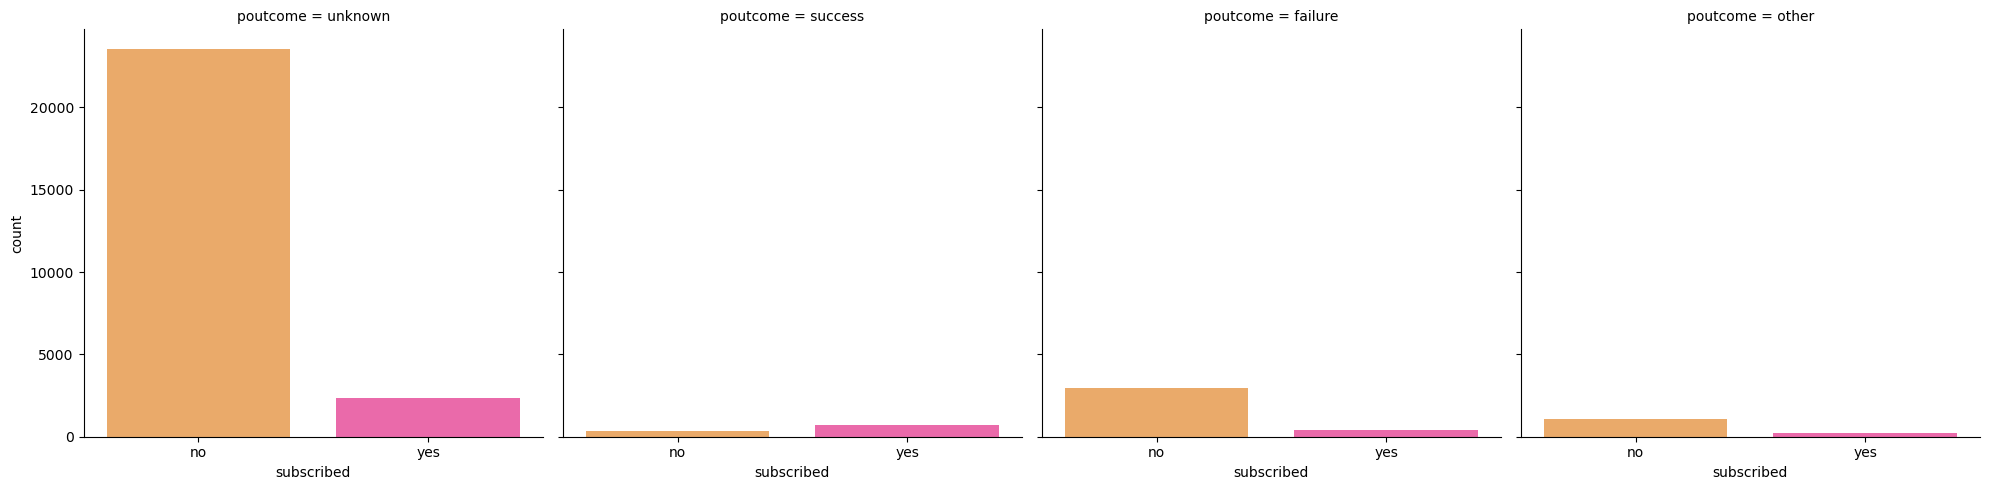

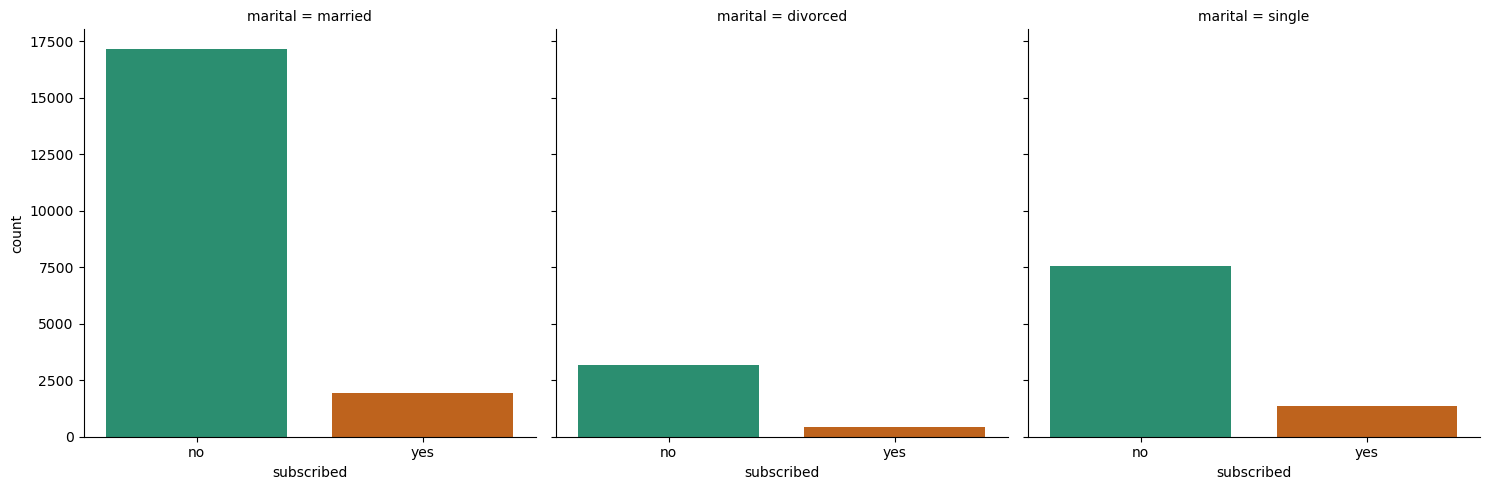

In [43]:
sns.catplot(x='subscribed',col='education', data=df, kind='count', palette='spring_r')
sns.catplot(x='subscribed',col='job', data=df, kind='count', palette='tab20b_r')
sns.catplot(x='subscribed',col='housing', data=df, kind='count', palette='twilight_shifted')
sns.catplot(x='subscribed',col='loan', data=df, kind='count', palette='Dark2')
sns.catplot(x='subscribed',col='month', data=df, kind='count', palette='Dark2')
sns.catplot(x='subscribed',col='contact', data=df, kind='count', palette='Dark2')
sns.catplot(x='subscribed',col='poutcome', data=df, kind='count', palette='spring_r')
sns.catplot(x='subscribed',col='marital', data=df, kind='count', palette='Dark2')
plt.show()

from the first plot, we can see that thos who did not subscibe are more than those who subscribed in all educational level with secondary education being the highest
from the third plot we can also see that there are more subscriber among those that do not have housing loan
from the firth plot we can see that more subscriber uses cellular compare to other mode of contact
we also notice that most subscriber are married.


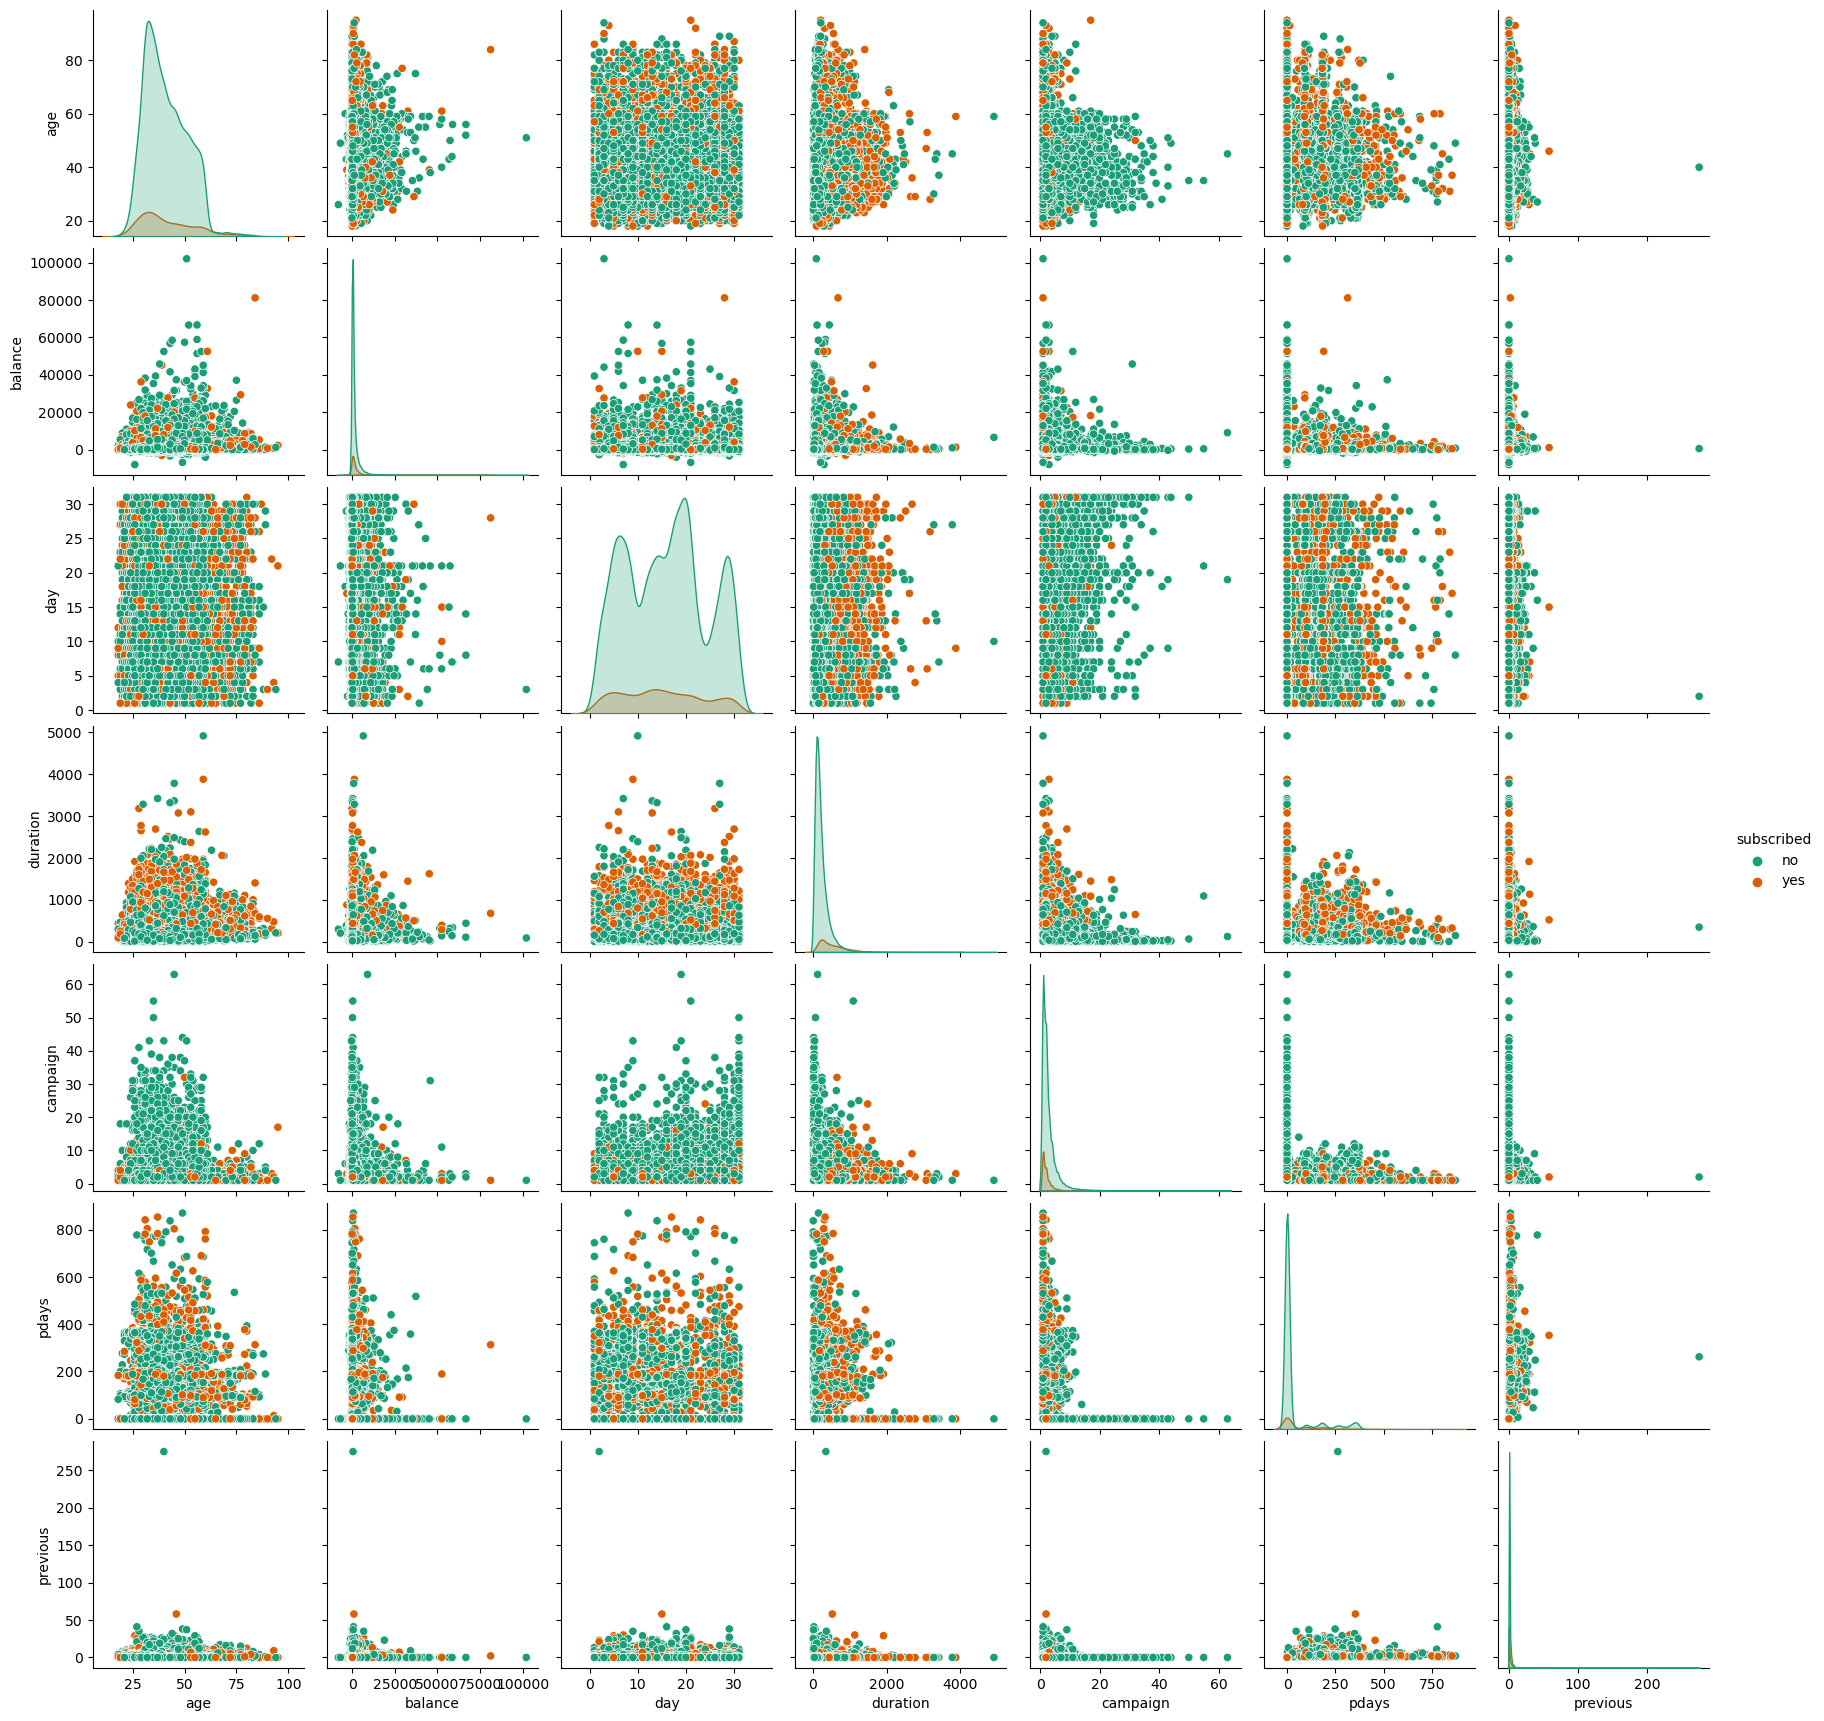

In [44]:
sns.pairplot(df,hue='subscribed',palette='Dark2')
plt.show()

The pairplot give the pairwise rotation between features on the basis of the target 'subscribed'.on the diagonal we can notice the distribution plots

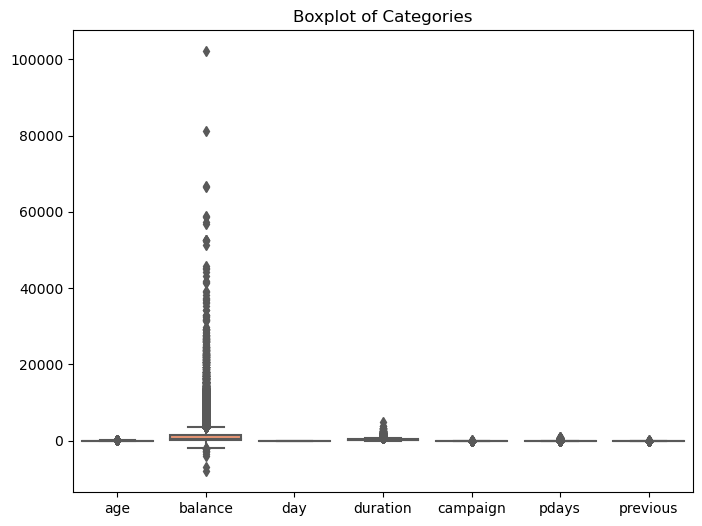

In [59]:
plt.figure(figsize=(8, 6))
sns.boxplot(data=df, palette='Set2')  
plt.title('Boxplot of Categories')
plt.show()

we can see that otliers are present in all columns except days

In [61]:
from scipy.stats import zscore
out_features=df[['age','balance','duration', 'pdays','campaign']]
z=np.abs(zscore(out_features))
z

age   balance  duration     pdays  campaign
ID                                                     
26110  1.415793  0.187933  0.832754  0.408555  0.245906
40576  0.937156  0.449397  0.649957  0.408555  0.245906
15320  1.313627  0.156159  0.070449  0.408555  0.567059
43962  1.509911  0.635055  2.368149  0.447299  0.567059
29842  0.937156  0.411091  0.474054  0.408555  0.567059
...         ...       ...       ...       ...       ...
36483  1.125392  0.450388  0.552724  0.408555  0.245906
40178  1.133439  0.324903  0.699635  0.408555  0.245906
19710  0.843038  0.347358  0.859979  0.408555  0.075247
38556  1.509911  0.376088  0.918319  2.994723  1.359859
14156  1.321675  0.383022  6.669728  0.408555  0.245906

[31647 rows x 5 columns]

In [62]:
np.where(z>3)

(array([   21,    26,    36, ..., 31622, 31622, 31646], dtype=int64),
 array([4, 1, 3, ..., 0, 3, 2], dtype=int64))

In [63]:
z.iloc[21,4]

9.70983664417751

In [64]:
df1=df[(z<3).all(axis=1)]
df1.shape

(28434, 17)

In [65]:
print('old dataframe:', df.shape[0])
print('new dataframe:', df1.shape[0])

old dataframe: 31647
new dataframe: 28434


In [66]:
print('Data loss percentage:', ((df.shape[0]-df1.shape[0])/df.shape[0])*100)

Data loss percentage: 10.152621101526211


10% data loss is within acceptable range

In [67]:
df=df1

# checking for Skewness

In [68]:
df.skew()

age          0.442184
balance      2.428374
day          0.075313
duration     1.594527
campaign     2.050191
pdays        2.704826
previous    58.136422
dtype: float64

we can see skewness in all the numerical column except for age and day

# removing skewness

In [69]:
df['balance']=np.cbrt(df['balance'])

In [70]:
df.skew()

age          0.442184
balance     -0.436812
day          0.075313
duration     1.594527
campaign     2.050191
pdays        2.704826
previous    58.136422
dtype: float64

In [71]:
df['duration']=np.cbrt(df['duration'])
df['campaign']=np.cbrt(df['campaign'])
df['pdays']=np.cbrt(df['pdays'])
df['previous']=np.cbrt(df['previous'])

In [72]:
df.skew()

age         0.442184
balance    -0.436812
day         0.075313
duration    0.303775
campaign    0.991877
pdays       2.076442
previous    2.413981
dtype: float64

# Encoding Categorical data

In [73]:
from sklearn.preprocessing import OrdinalEncoder
OE=OrdinalEncoder()
for i in df.columns:
    if df[i].dtypes=='object':
        df[i]=OE.fit_transform(df[i].values.reshape(-1,1))

df

age   job  marital  education  default    balance  housing  loan  \
ID                                                                        
26110   56   0.0      1.0        3.0      0.0  12.456918      0.0   0.0   
40576   31  11.0      1.0        1.0      0.0   1.442250      0.0   0.0   
15320   27   7.0      1.0        1.0      0.0   9.622603      1.0   0.0   
43962   57   4.0      0.0        2.0      0.0  14.868480      0.0   0.0   
29842   31   9.0      1.0        1.0      0.0   4.918685      1.0   0.0   
...    ...   ...      ...        ...      ...        ...      ...   ...   
9476    37   9.0      2.0        2.0      0.0  10.939057      0.0   0.0   
36483   29   4.0      2.0        2.0      0.0   0.000000      1.0   0.0   
40178   53   4.0      0.0        2.0      0.0   7.243156      0.0   1.0   
19710   32   4.0      2.0        2.0      0.0   6.782423      0.0   0.0   
38556   57   9.0      1.0        1.0      0.0   6.082202      1.0   0.0   

       contact  day  month  duration  campaign     pdays  previous  poutcome  \
ID                                                                             
26110      1.0   19    9.0  3.530348  1.259921 -1.000000  0.000000       3.0   
40576      0.0   20    5.0  4.497941  1.259921 -1.000000  0.000000       3.0   
15320      0.0   18    5.0  6.214465  1.000000 -1.000000  0.000000       3.0   
43962      0.0   22    6.0  9.535417  1.000000  4.379519  1.442250       2.0   
29842      0.0    4    3.0  7.243156  1.000000 -1.000000  0.000000       3.0   
...        ...  ...    ...       ...       ...       ...       ...       ...   
9476       2.0    6    6.0  7.617412  1.259921 -1.000000  0.000000       3.0   
36483      0.0   12    8.0  4.876999  1.259921 -1.000000  0.000000       3.0   
40178      0.0    5    6.0  7.594363  1.259921 -1.000000  0.000000       3.0   
19710      0.0    7    1.0  3.332222  1.442250 -1.000000  0.000000       3.0   
38556      1.0   15    8.0  2.802039  1.912931  6.958943  2.289428       0.0   

       subscribed  
ID                 
26110         0.0  
40576         0.0  
15320         0.0  
43962         1.0  
29842         0.0  
...           ...  
9476          0.0  
36483         0.0  
40178         1.0  
19710         0.0  
38556         0.0  

[28434 rows x 17 columns]

In [74]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 28434 entries, 26110 to 38556
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   age         28434 non-null  int64  
 1   job         28434 non-null  float64
 2   marital     28434 non-null  float64
 3   education   28434 non-null  float64
 4   default     28434 non-null  float64
 5   balance     28434 non-null  float64
 6   housing     28434 non-null  float64
 7   loan        28434 non-null  float64
 8   contact     28434 non-null  float64
 9   day         28434 non-null  int64  
 10  month       28434 non-null  float64
 11  duration    28434 non-null  float64
 12  campaign    28434 non-null  float64
 13  pdays       28434 non-null  float64
 14  previous    28434 non-null  float64
 15  poutcome    28434 non-null  float64
 16  subscribed  28434 non-null  float64
dtypes: float64(15), int64(2)
memory usage: 3.9 MB


In [75]:
df.describe()

age          job       marital     education       default  \
count  28434.000000  28434.00000  28434.000000  28434.000000  28434.000000   
mean      40.653584      4.34814      1.168531      1.225645      0.019167   
std       10.087992      3.28899      0.606081      0.746632      0.137115   
min       18.000000      0.00000      0.000000      0.000000      0.000000   
25%       33.000000      1.00000      1.000000      1.000000      0.000000   
50%       39.000000      4.00000      1.000000      1.000000      0.000000   
75%       48.000000      7.00000      2.000000      2.000000      0.000000   
max       72.000000     11.00000      2.000000      3.000000      1.000000   

            balance       housing          loan       contact           day  \
count  28434.000000  28434.000000  28434.000000  28434.000000  28434.000000   
mean       7.153169      0.551452      0.166631      0.665436     15.839312   
std        6.195707      0.497354      0.372653      0.910481      8.389594   
min      -18.988913      0.000000      0.000000      0.000000      1.000000   
25%        4.061548      0.000000      0.000000      0.000000      8.000000   
50%        7.559526      1.000000      0.000000      0.000000     16.000000   
75%       11.062999      1.000000      0.000000      2.000000     21.000000   
max       21.857900      1.000000      1.000000      2.000000     31.000000   

              month      duration      campaign         pdays      previous  \
count  28434.000000  28434.000000  28434.000000  28434.000000  28434.000000   
mean       5.492931      5.772227      1.280164     -0.033249      0.203989   
std        2.990983      1.563404      0.295499      2.344735      0.509309   
min        0.000000      0.000000      1.000000     -1.000000      0.000000   
25%        3.000000      4.702669      1.000000     -1.000000      0.000000   
50%        6.000000      5.625226      1.259921     -1.000000      0.000000   
75%        8.000000      6.738664      1.442250     -1.000000      0.000000   
max       11.000000     10.095747      2.289428      6.958943      6.502957   

           poutcome    subscribed  
count  28434.000000  28434.000000  
mean       2.649117      0.103327  
std        0.895053      0.304391  
min        0.000000      0.000000  
25%        3.000000      0.000000  
50%        3.000000      0.000000  
75%        3.000000      0.000000  
max        3.000000      1.000000

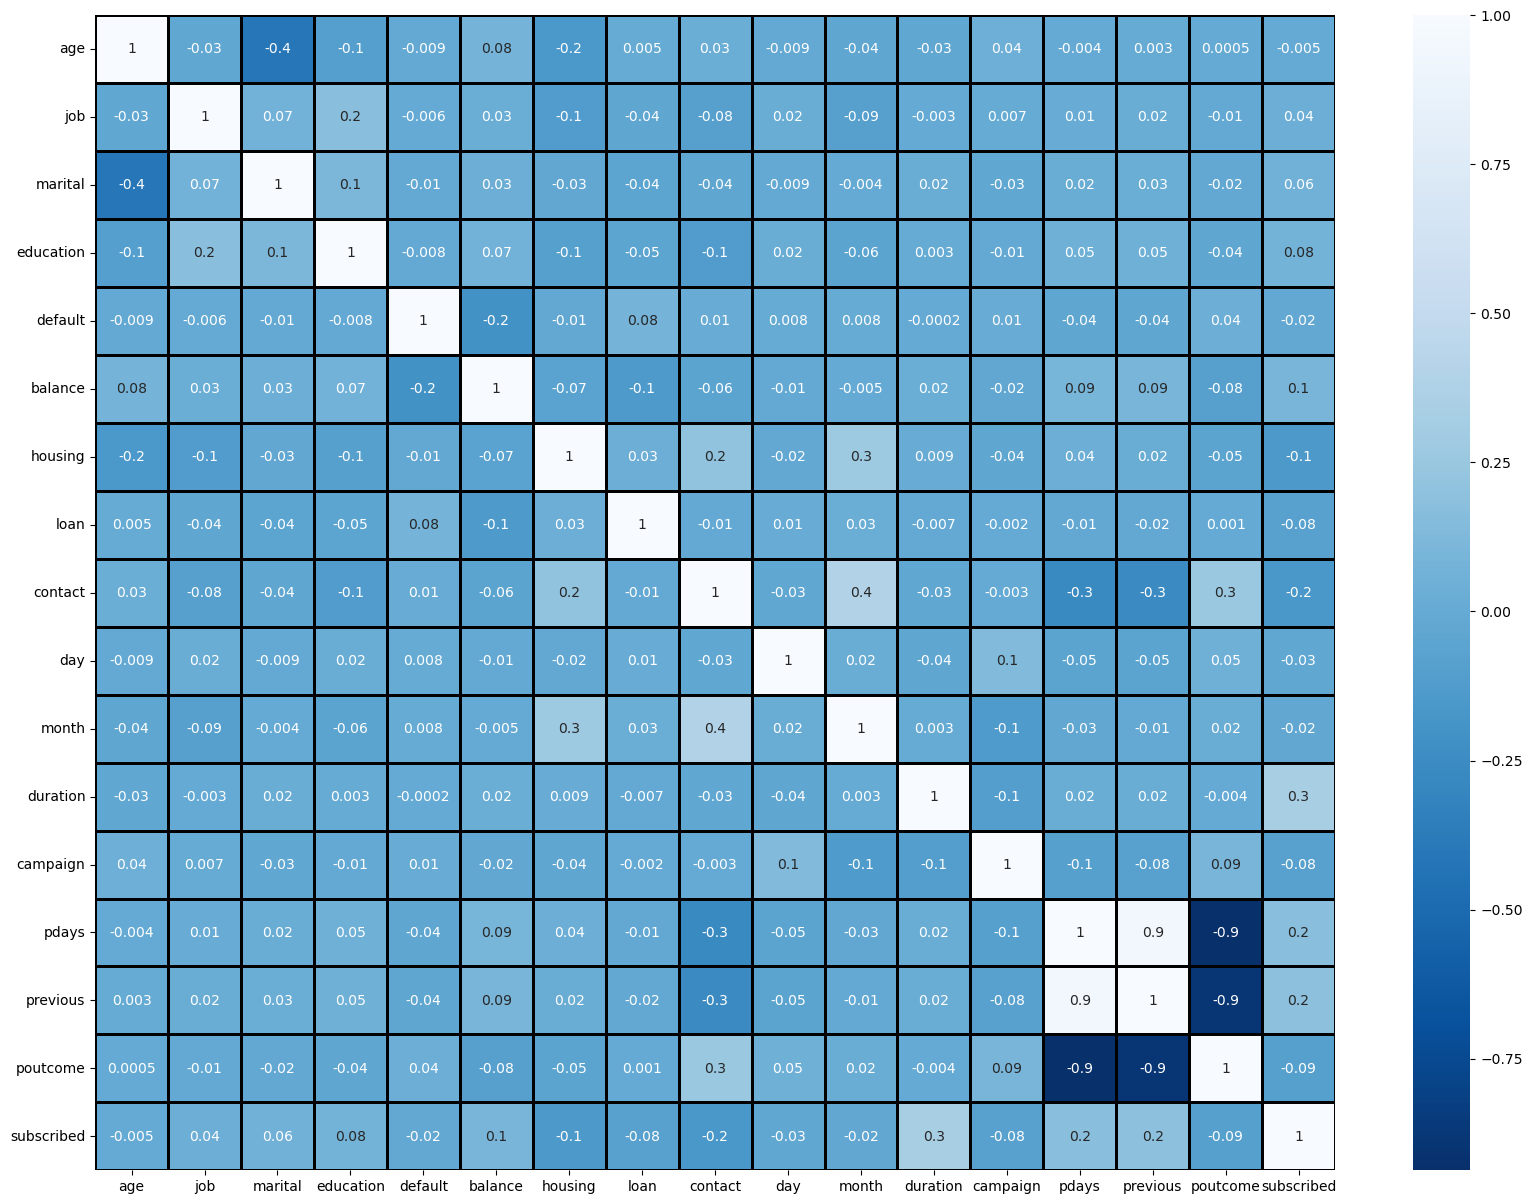

In [76]:
plt.figure(figsize=(20,15))
sns.heatmap(df.corr(),linewidths=0-1,fmt='.1g',linecolor='black', annot=True,cmap='Blues_r')
plt.yticks(rotation=0)
plt.show()

In [77]:
cor=df.corr()

In [78]:
cor['subscribed'].sort_values(ascending=False)

subscribed    1.000000
duration      0.328296
previous      0.188517
pdays         0.171495
balance       0.095667
education     0.076147
marital       0.056402
job           0.036963
age          -0.005340
default      -0.015432
month        -0.021951
day          -0.030229
loan         -0.076449
campaign     -0.081796
poutcome     -0.093089
housing      -0.146166
contact      -0.159398
Name: subscribed, dtype: float64

we can observe the negative and positive correlation with the Target value

In [79]:
cor=df.corr()
cor

age       job   marital  education   default   balance  \
age         1.000000 -0.030480 -0.410347  -0.100054 -0.009260  0.080305   
job        -0.030480  1.000000  0.066581   0.169178 -0.006374  0.026846   
marital    -0.410347  0.066581  1.000000   0.109797 -0.011786  0.034497   
education  -0.100054  0.169178  0.109797   1.000000 -0.007550  0.065171   
default    -0.009260 -0.006374 -0.011786  -0.007550  1.000000 -0.209043   
balance     0.080305  0.026846  0.034497   0.065171 -0.209043  1.000000   
housing    -0.154974 -0.121861 -0.026667  -0.095860 -0.014720 -0.071076   
loan        0.005308 -0.037318 -0.044613  -0.048048  0.081349 -0.140780   
contact     0.029525 -0.083824 -0.042624  -0.121811  0.014463 -0.055919   
day        -0.009173  0.020434 -0.009317   0.016838  0.008089 -0.013112   
month      -0.039771 -0.086901 -0.003941  -0.055069  0.007577 -0.004903   
duration   -0.031444 -0.002802  0.017552   0.002652 -0.000190  0.024541   
campaign    0.040689  0.006972 -0.031599  -0.010387  0.012615 -0.023677   
pdays      -0.004191  0.013581  0.023637   0.047892 -0.037668  0.090250   
previous    0.002611  0.016527  0.026978   0.052766 -0.037066  0.092458   
poutcome    0.000541 -0.012098 -0.017218  -0.041194  0.035029 -0.083495   
subscribed -0.005340  0.036963  0.056402   0.076147 -0.015432  0.095667   

             housing      loan   contact       day     month  duration  \
age        -0.154974  0.005308  0.029525 -0.009173 -0.039771 -0.031444   
job        -0.121861 -0.037318 -0.083824  0.020434 -0.086901 -0.002802   
marital    -0.026667 -0.044613 -0.042624 -0.009317 -0.003941  0.017552   
education  -0.095860 -0.048048 -0.121811  0.016838 -0.055069  0.002652   
default    -0.014720  0.081349  0.014463  0.008089  0.007577 -0.000190   
balance    -0.071076 -0.140780 -0.055919 -0.013112 -0.004903  0.024541   
housing     1.000000  0.032111  0.212962 -0.015209  0.270918  0.009208   
loan        0.032111  1.000000 -0.012422  0.013436  0.027594 -0.006804   
contact     0.212962 -0.012422  1.000000 -0.029314  0.388446 -0.034439   
day        -0.015209  0.013436 -0.029314  1.000000  0.017346 -0.038307   
month       0.270918  0.027594  0.388446  0.017346  1.000000  0.002942   
duration    0.009208 -0.006804 -0.034439 -0.038307  0.002942  1.000000   
campaign   -0.041666 -0.002249 -0.002658  0.129808 -0.130453 -0.107618   
pdays       0.037653 -0.014494 -0.267767 -0.053628 -0.027804  0.023528   
previous    0.018205 -0.017574 -0.257592 -0.053909 -0.011864  0.022138   
poutcome   -0.053184  0.001000  0.254244  0.047510  0.019903 -0.004168   
subscribed -0.146166 -0.076449 -0.159398 -0.030229 -0.021951  0.328296   

            campaign     pdays  previous  poutcome  subscribed  
age         0.040689 -0.004191  0.002611  0.000541   -0.005340  
job         0.006972  0.013581  0.016527 -0.012098    0.036963  
marital    -0.031599  0.023637  0.026978 -0.017218    0.056402  
education  -0.010387  0.047892  0.052766 -0.041194    0.076147  
default     0.012615 -0.037668 -0.037066  0.035029   -0.015432  
balance    -0.023677  0.090250  0.092458 -0.083495    0.095667  
housing    -0.041666  0.037653  0.018205 -0.053184   -0.146166  
loan       -0.002249 -0.014494 -0.017574  0.001000   -0.076449  
contact    -0.002658 -0.267767 -0.257592  0.254244   -0.159398  
day         0.129808 -0.053628 -0.053909  0.047510   -0.030229  
month      -0.130453 -0.027804 -0.011864  0.019903   -0.021951  
duration   -0.107618  0.023528  0.022138 -0.004168    0.328296  
campaign    1.000000 -0.096665 -0.079379  0.094493   -0.081796  
pdays      -0.096665  1.000000  0.941683 -0.937209    0.171495  
previous   -0.079379  0.941683  1.000000 -0.890509    0.188517  
poutcome    0.094493 -0.937209 -0.890509  1.000000   -0.093089  
subscribed -0.081796  0.171495  0.188517 -0.093089    1.000000

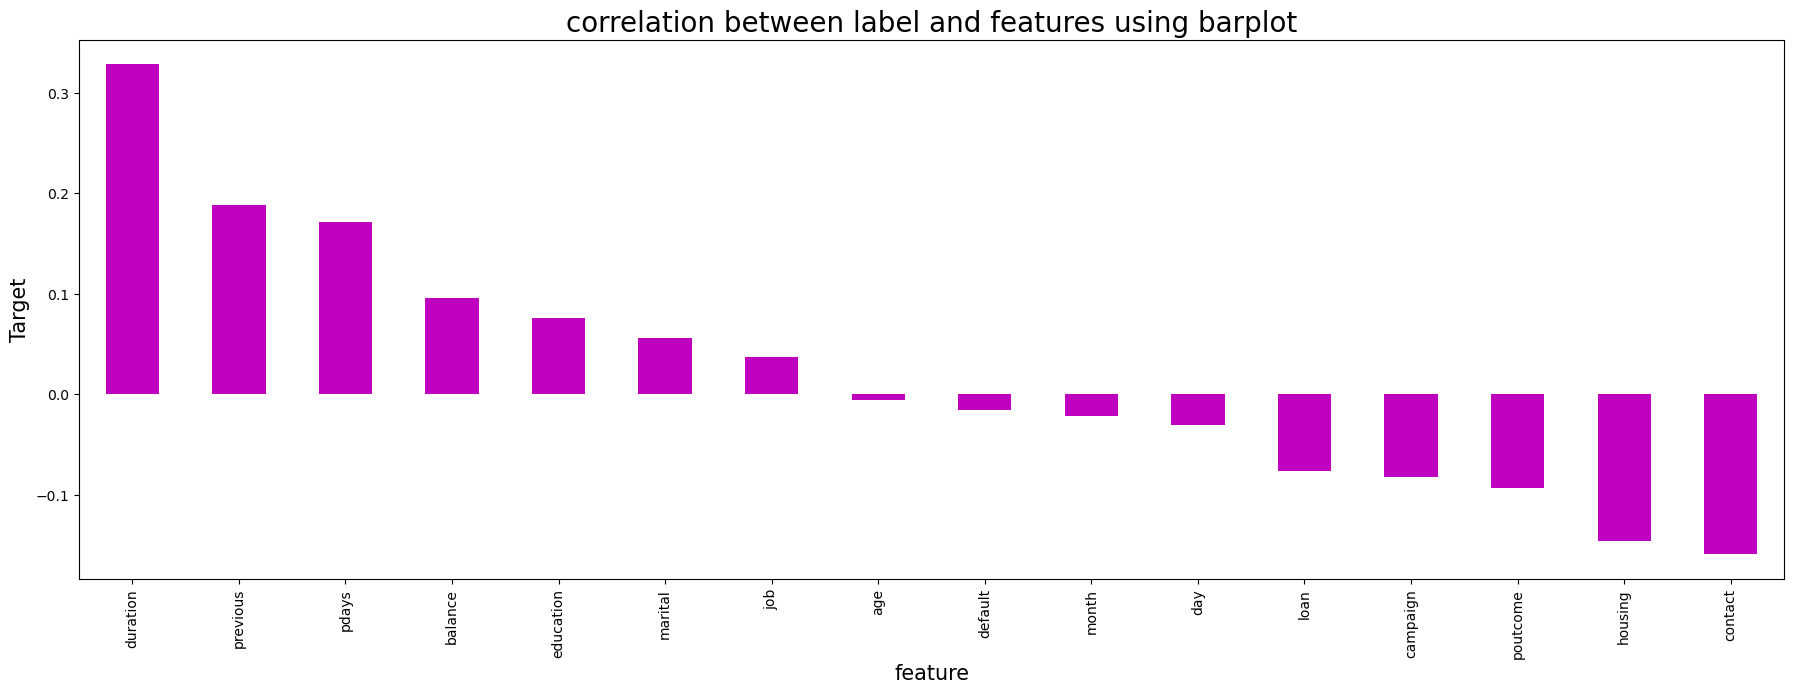

In [80]:
plt.figure(figsize=(22,7))
df.corr()['subscribed'].sort_values(ascending=False).drop(['subscribed']).plot(kind='bar',color='m')
plt.xlabel('feature',fontsize=15)
plt.ylabel('Target',fontsize=15)
plt.title('correlation between label and features using barplot',fontsize=20)
plt.show()

In [82]:
df.drop('age',axis=1,inplace=True)

# Seperating features and Label

In [88]:
x=df.drop('subscribed', axis=1)
y=df['subscribed']

# Feature Scaling using standard Scalerization

In [89]:
from sklearn.preprocessing import StandardScaler
Scaler=StandardScaler()
x=pd.DataFrame(Scaler.fit_transform(x),columns=x.columns)
x

job   marital  education   default   balance   housing      loan  \
0     -1.322052 -0.278071   2.376519 -0.139792  0.856051 -1.108791 -0.447157   
1      2.022498 -0.278071  -0.302223 -0.139792 -0.921770 -1.108791 -0.447157   
2      0.806298 -0.278071  -0.302223 -0.139792  0.398579  0.901883 -0.447157   
3     -0.105852 -1.928046   1.037148 -0.139792  1.245289 -1.108791 -0.447157   
4      1.414398 -0.278071  -0.302223 -0.139792 -0.360657  0.901883 -0.447157   
...         ...       ...        ...       ...       ...       ...       ...   
28429  1.414398  1.371903   1.037148 -0.139792  0.611061 -1.108791 -0.447157   
28430 -0.105852  1.371903   1.037148 -0.139792 -1.154557  0.901883 -0.447157   
28431 -0.105852 -1.928046   1.037148 -0.139792  0.014524 -1.108791  2.236351   
28432 -0.105852  1.371903   1.037148 -0.139792 -0.059840 -1.108791 -0.447157   
28433  1.414398 -0.278071  -0.302223 -0.139792 -0.172859  0.901883 -0.447157   

        contact       day     month  duration  campaign  previous  poutcome  
0      0.367465  0.376746  1.172568 -1.433998 -0.068506 -0.400527  0.392031  
1     -0.730874  0.495943 -0.164809 -0.815086 -0.068506 -0.400527  0.392031  
2     -0.730874  0.257548 -0.164809  0.282874 -0.948123 -0.400527  0.392031  
3     -0.730874  0.734338  0.169536  2.407092 -0.948123  2.431298 -0.725240  
4     -0.730874 -1.411215 -0.833497  0.940867 -0.948123 -0.400527  0.392031  
...         ...       ...       ...       ...       ...       ...       ...  
28429  1.465804 -1.172820  0.169536  1.180256 -0.068506 -0.400527  0.392031  
28430 -0.730874 -0.457636  0.838224 -0.572625 -0.068506 -0.400527  0.392031  
28431 -0.730874 -1.292018  0.169536  1.165514 -0.068506 -0.400527  0.392031  
28432 -0.730874 -1.053623 -1.502185 -1.560728  0.548525 -0.400527  0.392031  
28433  0.367465 -0.100044  0.838224 -1.899855  2.141391  4.094715 -2.959784  

[28434 rows x 14 columns]

# Checking Variance inflation Factor(removing biasness

In [85]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif=pd.DataFrame()
vif['VIF values']=[variance_inflation_factor(x.values,i) for i in range(len(x.columns))]
vif['feature']=x.columns
vif

VIF values    feature
0     1.048583        job
1     1.019089    marital
2     1.059876  education
3     1.050472    default
4     1.081667    balance
5     1.131877    housing
6     1.030763       loan
7     1.325980    contact
8     1.025768        day
9     1.272797      month
10    1.017417   duration
11    1.060686   campaign
12   15.225790      pdays
13    8.963672   previous
14    8.326586   poutcome

by checking vif we can find the features causing multicollinearity problem. here pday,previous and poutcome have vif value greater than 5 which means they have high correllation with other feature. we willdrop one of the column first, if the same issue persit then we will drop the second column having high VIF

In [87]:
df.drop('pdays',axis=1,inplace=True)

In [90]:
vif=pd.DataFrame()
vif['VIF values']=[variance_inflation_factor(x.values,i) for i in range(len(x.columns))]
vif['feature']=x.columns
vif

VIF values    feature
0     1.048537        job
1     1.019083    marital
2     1.059874  education
3     1.050464    default
4     1.081624    balance
5     1.130854    housing
6     1.030418       loan
7     1.323821    contact
8     1.025734        day
9     1.270843      month
10    1.016355   duration
11    1.058828   campaign
12    4.910395   previous
13    4.923587   poutcome

multicollinearity problem has been solved

In [91]:
y.value_counts()

0.0    25496
1.0     2938
Name: subscribed, dtype: int64

here is we can say there is class imbalance issue

In [92]:
from imblearn.over_sampling import SMOTE
SM=SMOTE()
x1,y1=SM.fit_resample(x,y)


In [93]:
y1.value_counts()

0.0    25496
1.0    25496
Name: subscribed, dtype: int64

# Modelling

In [94]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
maxAccu=0
maxRS=0
for i in range(1,200):
    x_train,x_test,y_train,y_test=train_test_split(x1,y1,test_size=0.30,random_state=i)
    RFR=RandomForestClassifier()
    RFR.fit(x_train,y_train)
    pred=RFR.predict(x_test)
    acc=accuracy_score(y_test,pred)
    if acc>maxAccu:
        maxAcc=acc
        maxRS=i
print('Best accuracy is', maxAcc,'at rand_state',maxRS)

Best accuracy is 0.9526081840763498 at rand_state 199


In [95]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.30,random_state=maxRS)

In [96]:
from sklearn.ensemble import RandomForestClassifier,ExtraTreesClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import GradientBoostingClassifier, AdaBoostClassifier,BaggingClassifier
from sklearn.metrics import classification_report,confusion_matrix,roc_curve, accuracy_score
from sklearn.model_selection import cross_val_score

In [97]:
RFC=RandomForestClassifier()
RFC.fit(x_train, y_train)
predRFC= RFC.predict(x_test)
print(accuracy_score(y_test,predRFC))
print(confusion_matrix(y_test,predRFC))
print(classification_report(y_test,predRFC))

0.912436994490681
[[7506  189]
 [ 558  278]]
              precision    recall  f1-score   support

         0.0       0.93      0.98      0.95      7695
         1.0       0.60      0.33      0.43       836

    accuracy                           0.91      8531
   macro avg       0.76      0.65      0.69      8531
weighted avg       0.90      0.91      0.90      8531



In [98]:
LR=LogisticRegression()
LR.fit(x_train,y_train)
predLR=LR.predict(x_test)
print(accuracy_score(y_test,predLR))
print(confusion_matrix(y_test,predLR))
print(classification_report(y_test,predLR))

0.9085687492673779
[[7520  175]
 [ 605  231]]
              precision    recall  f1-score   support

         0.0       0.93      0.98      0.95      7695
         1.0       0.57      0.28      0.37       836

    accuracy                           0.91      8531
   macro avg       0.75      0.63      0.66      8531
weighted avg       0.89      0.91      0.89      8531



In [99]:
svc=SVC()
svc.fit(x_train,y_train)
predsvc=svc.predict(x_test)
print(accuracy_score(y_test,predsvc))
print(confusion_matrix(y_test,predsvc))
print(classification_report(y_test,predsvc))

0.9111475794162466
[[7604   91]
 [ 667  169]]
              precision    recall  f1-score   support

         0.0       0.92      0.99      0.95      7695
         1.0       0.65      0.20      0.31       836

    accuracy                           0.91      8531
   macro avg       0.78      0.60      0.63      8531
weighted avg       0.89      0.91      0.89      8531



In [100]:
GB=GradientBoostingClassifier()
GB.fit(x_train,y_train)
predGB=GB.predict(x_test)
print(accuracy_score(y_test,predGB))
print(confusion_matrix(y_test,predGB))
print(classification_report(y_test,predGB))

0.9107959207595827
[[7493  202]
 [ 559  277]]
              precision    recall  f1-score   support

         0.0       0.93      0.97      0.95      7695
         1.0       0.58      0.33      0.42       836

    accuracy                           0.91      8531
   macro avg       0.75      0.65      0.69      8531
weighted avg       0.90      0.91      0.90      8531



In [101]:
ABC=AdaBoostClassifier()
ABC.fit(x_train,y_train)
predABC=svc.predict(x_test)
print(accuracy_score(y_test,predABC))
print(confusion_matrix(y_test,predABC))
print(classification_report(y_test,predABC))

0.9111475794162466
[[7604   91]
 [ 667  169]]
              precision    recall  f1-score   support

         0.0       0.92      0.99      0.95      7695
         1.0       0.65      0.20      0.31       836

    accuracy                           0.91      8531
   macro avg       0.78      0.60      0.63      8531
weighted avg       0.89      0.91      0.89      8531



In [102]:
BC=BaggingClassifier ()
BC.fit(x_train,y_train)
predBC=BC.predict(x_test)
print(accuracy_score(y_test,predBC))
print(confusion_matrix(y_test,predBC))
print(classification_report(y_test,predBC))

0.9062243582229516
[[7435  260]
 [ 540  296]]
              precision    recall  f1-score   support

         0.0       0.93      0.97      0.95      7695
         1.0       0.53      0.35      0.43       836

    accuracy                           0.91      8531
   macro avg       0.73      0.66      0.69      8531
weighted avg       0.89      0.91      0.90      8531



In [103]:
ET=ExtraTreesClassifier()
ET.fit(x_train,y_train)
predET=svc.predict(x_test)
print(accuracy_score(y_test,predET))
print(confusion_matrix(y_test,predET))
print(classification_report(y_test,predET))

0.9111475794162466
[[7604   91]
 [ 667  169]]
              precision    recall  f1-score   support

         0.0       0.92      0.99      0.95      7695
         1.0       0.65      0.20      0.31       836

    accuracy                           0.91      8531
   macro avg       0.78      0.60      0.63      8531
weighted avg       0.89      0.91      0.89      8531



# Cross validation Score

In [104]:
from sklearn.model_selection import cross_val_score
score=cross_val_score(RFC,x1,y1)
print(score)
print(score.mean())
print('difference btw accuracy score and crossvalidation score is',accuracy_score(y_test,predRFC)-score.mean())

[0.91067752 0.96431023 0.96283585 0.96587566 0.96175721]
0.9530912926506394
difference btw accuracy score and crossvalidation score is -0.04065429815995836


In [105]:
score=cross_val_score(LR,x1,y1)
print(score)
print(score.mean())
print('difference btw accuracy score and crossvalidation score is',accuracy_score(y_test,predLR)-score.mean())

[0.80811844 0.81900186 0.81741518 0.82535791 0.81447343]
0.8168733649675248
difference btw accuracy score and crossvalidation score is 0.09169538429985302


In [106]:
score=cross_val_score(svc,x1,y1)
print(score)
print(score.mean())
print('difference btw accuracy score and cross validation score is',accuracy_score(y_test,predsvc)-score.mean())

[0.85586822 0.86861457 0.87007256 0.8751716  0.86565993]
0.8670773782547082
difference btw accuracy score and cross validation score is 0.04407020116153837


In [107]:
score=cross_val_score(GB,x1,y1)
print(score)
print(score.mean())
print('difference btw accuracy score and crossvalidation score is',accuracy_score(y_test,predGB)-score.mean())

[0.84567114 0.91940386 0.92086684 0.93018239 0.91969014]
0.9071628736025229
difference btw accuracy score and crossvalidation score is 0.00363304715705981


In [108]:
score=cross_val_score(ABC,x1,y1)
print(score)
print(score.mean())
print('difference btw accuracy score and crossvalidation score is',accuracy_score(y_test,predABC)-score.mean())

[0.81664869 0.88685165 0.8890959  0.89674446 0.89105707]
0.8760795548079393
difference btw accuracy score and crossvalidation score is 0.03506802460830727


In [109]:
score=cross_val_score(BC,x1,y1)
print(score)
print(score.mean())
print('difference btw accuracy score and crossvalidation score is',accuracy_score(y_test,predBC)-score.mean())

[0.8785175  0.95175998 0.95077466 0.94930379 0.95214748]
0.9365006809672842
difference btw accuracy score and crossvalidation score is -0.030276322744332673


In [110]:
score=cross_val_score(ET,x1,y1)
print(score)
print(score.mean())
print('difference btw accuracy score and crossvalidation score is',accuracy_score(y_test,predET)-score.mean())

[0.95901559 0.96960486 0.96832712 0.97038635 0.9669543 ]
0.9668576461962545
difference btw accuracy score and crossvalidation score is -0.055710066780007894


extratree classifier is the best performing model and as such we will use it

# Hyperparameter Tunning

In [111]:
from sklearn.model_selection import GridSearchCV
parameters={'criterion':['gini','Entropy'],
          'random_state':[10,50,1000],
          'max_depth':[1,10,20],
          'n_jobs':[-2,-1,1],
          'n_estimators':[50,100,200,300]}

In [112]:
GCV=GridSearchCV(ExtraTreesClassifier(),parameters,cv=5)

In [113]:
GCV.fit(x_train, y_train)

GridSearchCV(cv=5, estimator=ExtraTreesClassifier(),
             param_grid={'criterion': ['gini', 'Entropy'],
                         'max_depth': [1, 10, 20],
                         'n_estimators': [50, 100, 200, 300],
                         'n_jobs': [-2, -1, 1],
                         'random_state': [10, 50, 1000]})

In [114]:
GCV.best_params_

{'criterion': 'gini',
 'max_depth': 1,
 'n_estimators': 50,
 'n_jobs': -2,
 'random_state': 10}

In [116]:
Final_model=ExtraTreesClassifier(criterion='gini',max_depth=1, n_estimators=50, n_jobs=-2, random_state=10)
Final_model.fit(x_train,y_train)
pred=Final_model.predict(x_test)
accu=accuracy_score(y_test,pred)
print(accu*100)

90.20044543429844


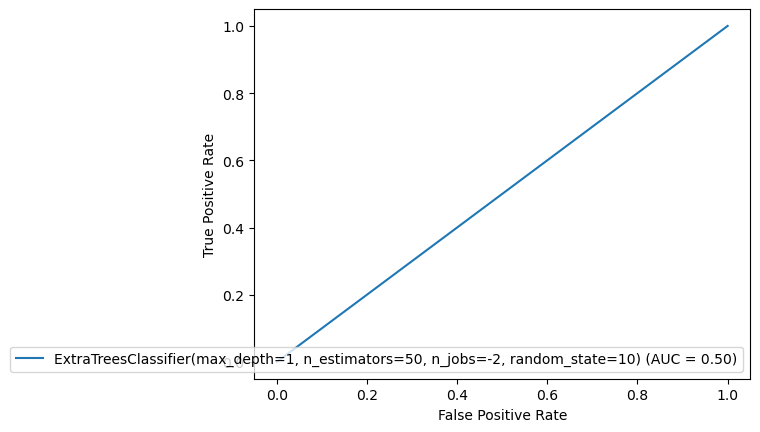

In [117]:
from sklearn import metrics
fpr,tpr, threshold=metrics.roc_curve(y_test,pred)
roc_auc=metrics.auc(fpr,tpr)
display=metrics.RocCurveDisplay(fpr=fpr,tpr=tpr,roc_auc=roc_auc,estimator_name=Final_model)
display.plot()

In [187]:
import joblib
joblib.dump(Final_model,'bank marketing.pkl')

['bank marketing.pkl']

In [119]:
df2=pd.read_csv('marketing')

In [120]:
df2

ID  age            job   marital  education default  balance  \
0      38441   32       services   married  secondary      no      118   
1      40403   78        retired  divorced    primary      no     2787   
2       3709   31  self-employed    single   tertiary      no      144   
3      37422   57       services    single    primary      no     3777   
4      12527   45    blue-collar  divorced  secondary      no     -705   
...      ...  ...            ...       ...        ...     ...      ...   
13559  23465   39     management   married   tertiary      no       45   
13560  11743   54    blue-collar   married    primary      no     2281   
13561  28292   35        retired   married    primary      no      285   
13562  45163   29         admin.    single  secondary      no      464   
13563  34839   29         admin.   married  secondary      no        2   

      housing loan    contact  day month  duration  campaign  pdays  previous  \
0         yes   no   cellular   15   may        20         6     -1         0   
1          no   no  telephone    1   jul       372         1     -1         0   
2         yes   no    unknown   16   may       676         1     -1         0   
3         yes   no  telephone   13   may        65         2     -1         0   
4          no  yes    unknown    3   jul       111         1     -1         0   
...       ...  ...        ...  ...   ...       ...       ...    ...       ...   
13559      no   no   cellular   28   aug       148         4     -1         0   
13560     yes   no    unknown   20   jun       158         1     -1         0   
13561     yes   no   cellular   29   jan       136         1     -1         0   
13562      no   no   cellular    9   nov       208         2     91         3   
13563     yes   no   cellular    6   may       339         1    362         1   

      poutcome  
0      unknown  
1      unknown  
2      unknown  
3      unknown  
4      unknown  
...        ...  
13559  unknown  
13560  unknown  
13561  unknown  
13562  success  
13563  failure  

[13564 rows x 17 columns]

In [122]:
df2.shape

(13564, 17)

In [124]:
df2.columns

Index(['ID', 'age', 'job', 'marital', 'education', 'default', 'balance',
       'housing', 'loan', 'contact', 'day', 'month', 'duration', 'campaign',
       'pdays', 'previous', 'poutcome'],
      dtype='object')

In [125]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13564 entries, 0 to 13563
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   ID         13564 non-null  int64 
 1   age        13564 non-null  int64 
 2   job        13564 non-null  object
 3   marital    13564 non-null  object
 4   education  13564 non-null  object
 5   default    13564 non-null  object
 6   balance    13564 non-null  int64 
 7   housing    13564 non-null  object
 8   loan       13564 non-null  object
 9   contact    13564 non-null  object
 10  day        13564 non-null  int64 
 11  month      13564 non-null  object
 12  duration   13564 non-null  int64 
 13  campaign   13564 non-null  int64 
 14  pdays      13564 non-null  int64 
 15  previous   13564 non-null  int64 
 16  poutcome   13564 non-null  object
dtypes: int64(8), object(9)
memory usage: 1.8+ MB


In [126]:
df2.dtypes

ID            int64
age           int64
job          object
marital      object
education    object
default      object
balance       int64
housing      object
loan         object
contact      object
day           int64
month        object
duration      int64
campaign      int64
pdays         int64
previous      int64
poutcome     object
dtype: object

In [127]:
df2.isnull().sum()

ID           0
age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
dtype: int64

In [128]:
df2.isnull().sum().sum()

0

<Axes: >

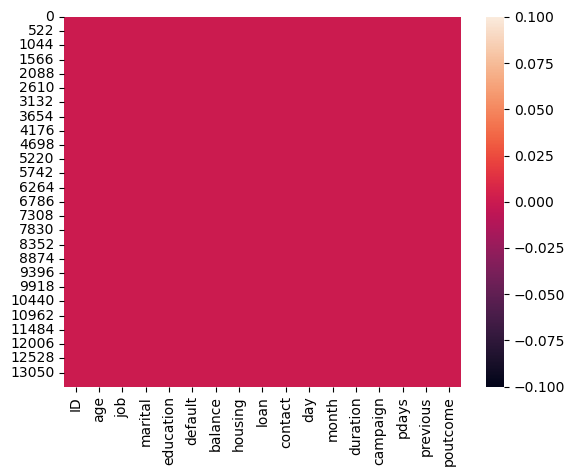

In [131]:
sns.heatmap(df2.isnull())

In [133]:
for i in df2.columns:
    print(df2[i].value_counts())
    print('\n')

38441    1
23664    1
23378    1
18945    1
32574    1
        ..
4606     1
23686    1
35672    1
8550     1
34839    1
Name: ID, Length: 13564, dtype: int64


32    628
34    609
35    580
31    579
33    566
     ... 
95      1
86      1
92      1
89      1
90      1
Name: age, Length: 75, dtype: int64


blue-collar      2890
management       2819
technician       2290
admin.           1540
services         1251
retired           690
entrepreneur      479
self-employed     456
unemployed        398
housemaid         366
student           303
unknown            82
Name: job, dtype: int64


married     8119
single      3868
divorced    1577
Name: marital, dtype: int64


secondary    6978
tertiary     4000
primary      2043
unknown       543
Name: education, dtype: int64


no     13334
yes      230
Name: default, dtype: int64


 0       1044
 1         58
 2         47
 3         46
 4         44
         ... 
-140        1
 6495       1
 8180       1
 3684       1
 4256       1
Name: 

In [134]:
df2.set_index('ID', inplace=True)

In [136]:
df2.shape

(13564, 16)

In [137]:
df2.head()

age            job   marital  education default  balance housing loan  \
ID                                                                             
38441   32       services   married  secondary      no      118     yes   no   
40403   78        retired  divorced    primary      no     2787      no   no   
3709    31  self-employed    single   tertiary      no      144     yes   no   
37422   57       services    single    primary      no     3777     yes   no   
12527   45    blue-collar  divorced  secondary      no     -705      no  yes   

         contact  day month  duration  campaign  pdays  previous poutcome  
ID                                                                         
38441   cellular   15   may        20         6     -1         0  unknown  
40403  telephone    1   jul       372         1     -1         0  unknown  
3709     unknown   16   may       676         1     -1         0  unknown  
37422  telephone   13   may        65         2     -1         0  unknown  
12527    unknown    3   jul       111         1     -1         0  unknown

In [138]:
categorical_col1=[]
for i in df2.dtypes.index:
    if df2.dtypes[i]=='object':
        categorical_col1.append(i)
print('categorical columns:', categorical_col1)
print('\n')

categorical columns: ['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'poutcome']




In [139]:
numerical_col1=[]
for i in df2.dtypes.index:
    if df2.dtypes[i]!='object':
        numerical_col1.append(i)
print('numerical columns:', numerical_col1)
print('\n')

numerical columns: ['age', 'balance', 'day', 'duration', 'campaign', 'pdays', 'previous']




In [140]:
df2.nunique().to_frame('No of unique value')

No of unique value
age                        75
job                        12
marital                     3
education                   4
default                     2
balance                  4292
housing                     2
loan                        2
contact                     3
day                        31
month                      12
duration                 1201
campaign                   40
pdays                     422
previous                   33
poutcome                    4

In [142]:
df2.describe()

age       balance           day      duration      campaign  \
count  13564.000000  13564.000000  13564.000000  13564.000000  13564.000000   
mean      40.887128   1358.496535     15.738646    258.278679      2.759510   
std       10.604108   3082.940623      8.288174    258.488648      3.060928   
min       18.000000  -3313.000000      1.000000      0.000000      1.000000   
25%       33.000000     71.000000      8.000000    102.000000      1.000000   
50%       39.000000    445.000000     16.000000    180.000000      2.000000   
75%       48.000000   1413.250000     21.000000    319.000000      3.000000   
max       95.000000  98417.000000     31.000000   3253.000000     58.000000   

              pdays      previous  
count  13564.000000  13564.000000  
mean      41.648555      0.594441  
std      101.985178      1.998193  
min       -1.000000      0.000000  
25%       -1.000000      0.000000  
50%       -1.000000      0.000000  
75%       -1.000000      0.000000  
max      850.000000     55.000000

In [143]:
print('Total Duplicate rows',df2.duplicated().sum())

Total Duplicate rows 0


married     8119
single      3868
divorced    1577
Name: marital, dtype: int64


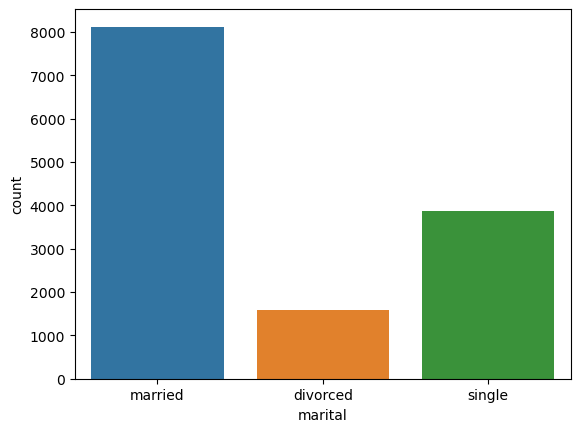

In [144]:
print(df2['marital'].value_counts())
ax=sns.countplot(x='marital',data=df2)
plt.show()

secondary    6978
tertiary     4000
primary      2043
unknown       543
Name: education, dtype: int64


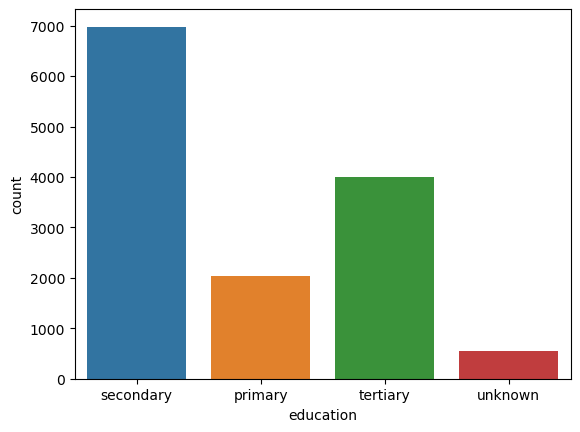

In [145]:
print(df2['education'].value_counts())
ax=sns.countplot(x='education',data=df2)
plt.show()

no     13334
yes      230
Name: default, dtype: int64


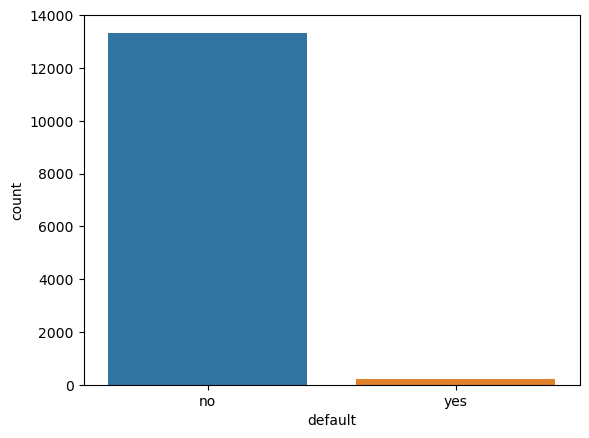

In [146]:
print(df2['default'].value_counts())
ax=sns.countplot(x='default',data=df2)
plt.show()

yes    7546
no     6018
Name: housing, dtype: int64


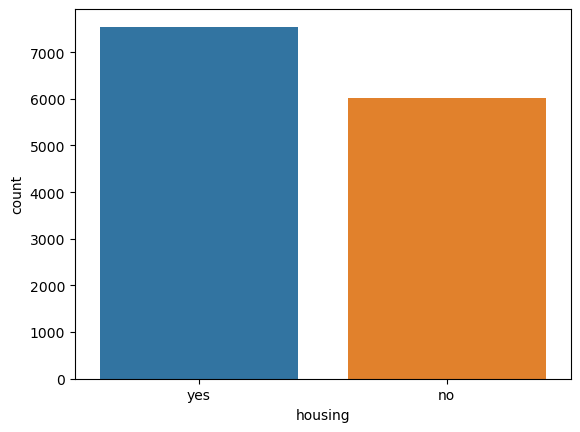

In [147]:
print(df2['housing'].value_counts())
ax=sns.countplot(x='housing',data=df2)
plt.show()

no     11451
yes     2113
Name: loan, dtype: int64


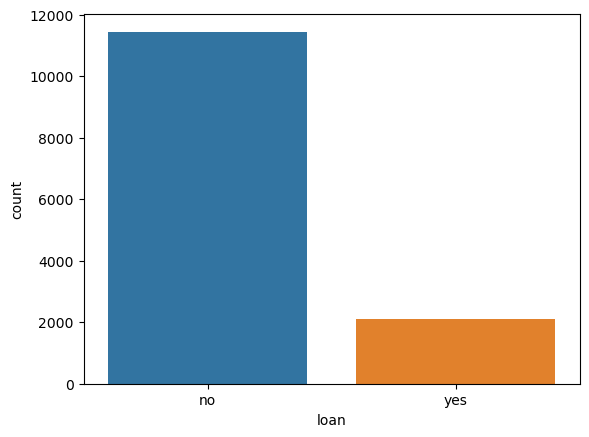

In [148]:
print(df2['loan'].value_counts())
ax=sns.countplot(x='loan',data=df2)
plt.show()

cellular     8862
unknown      3843
telephone     859
Name: contact, dtype: int64


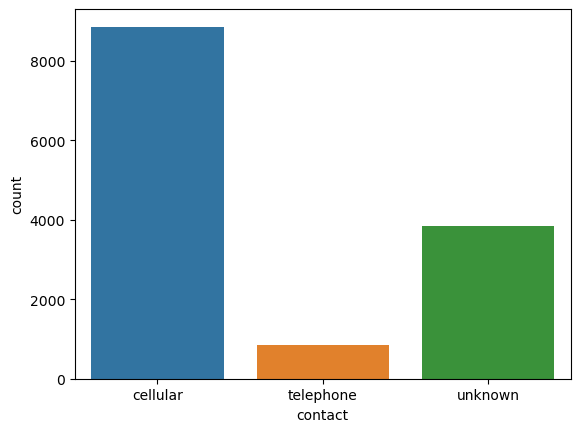

In [149]:
print(df2['contact'].value_counts())
ax=sns.countplot(x='contact',data=df2)
plt.show()

may    4097
jul    2051
aug    1914
jun    1603
nov    1187
apr     877
feb     822
jan     426
oct     226
sep     169
mar     135
dec      57
Name: month, dtype: int64


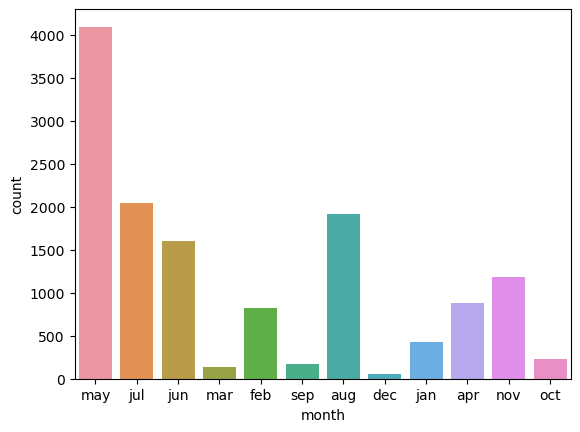

In [150]:
print(df2['month'].value_counts())
ax=sns.countplot(x='month',data=df2)
plt.show()

unknown    11030
failure     1539
other        552
success      443
Name: poutcome, dtype: int64


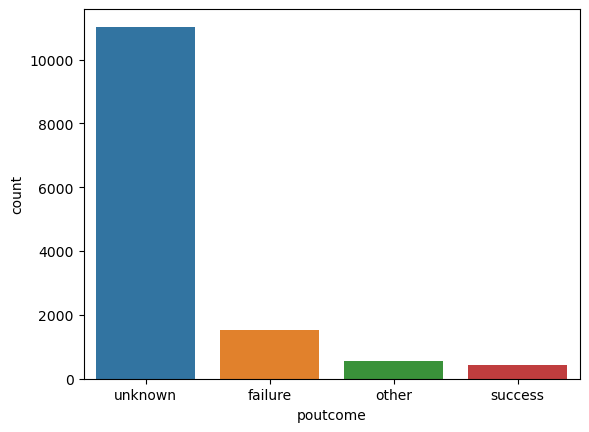

In [151]:
print(df2['poutcome'].value_counts())
ax=sns.countplot(x='poutcome',data=df2)
plt.show()

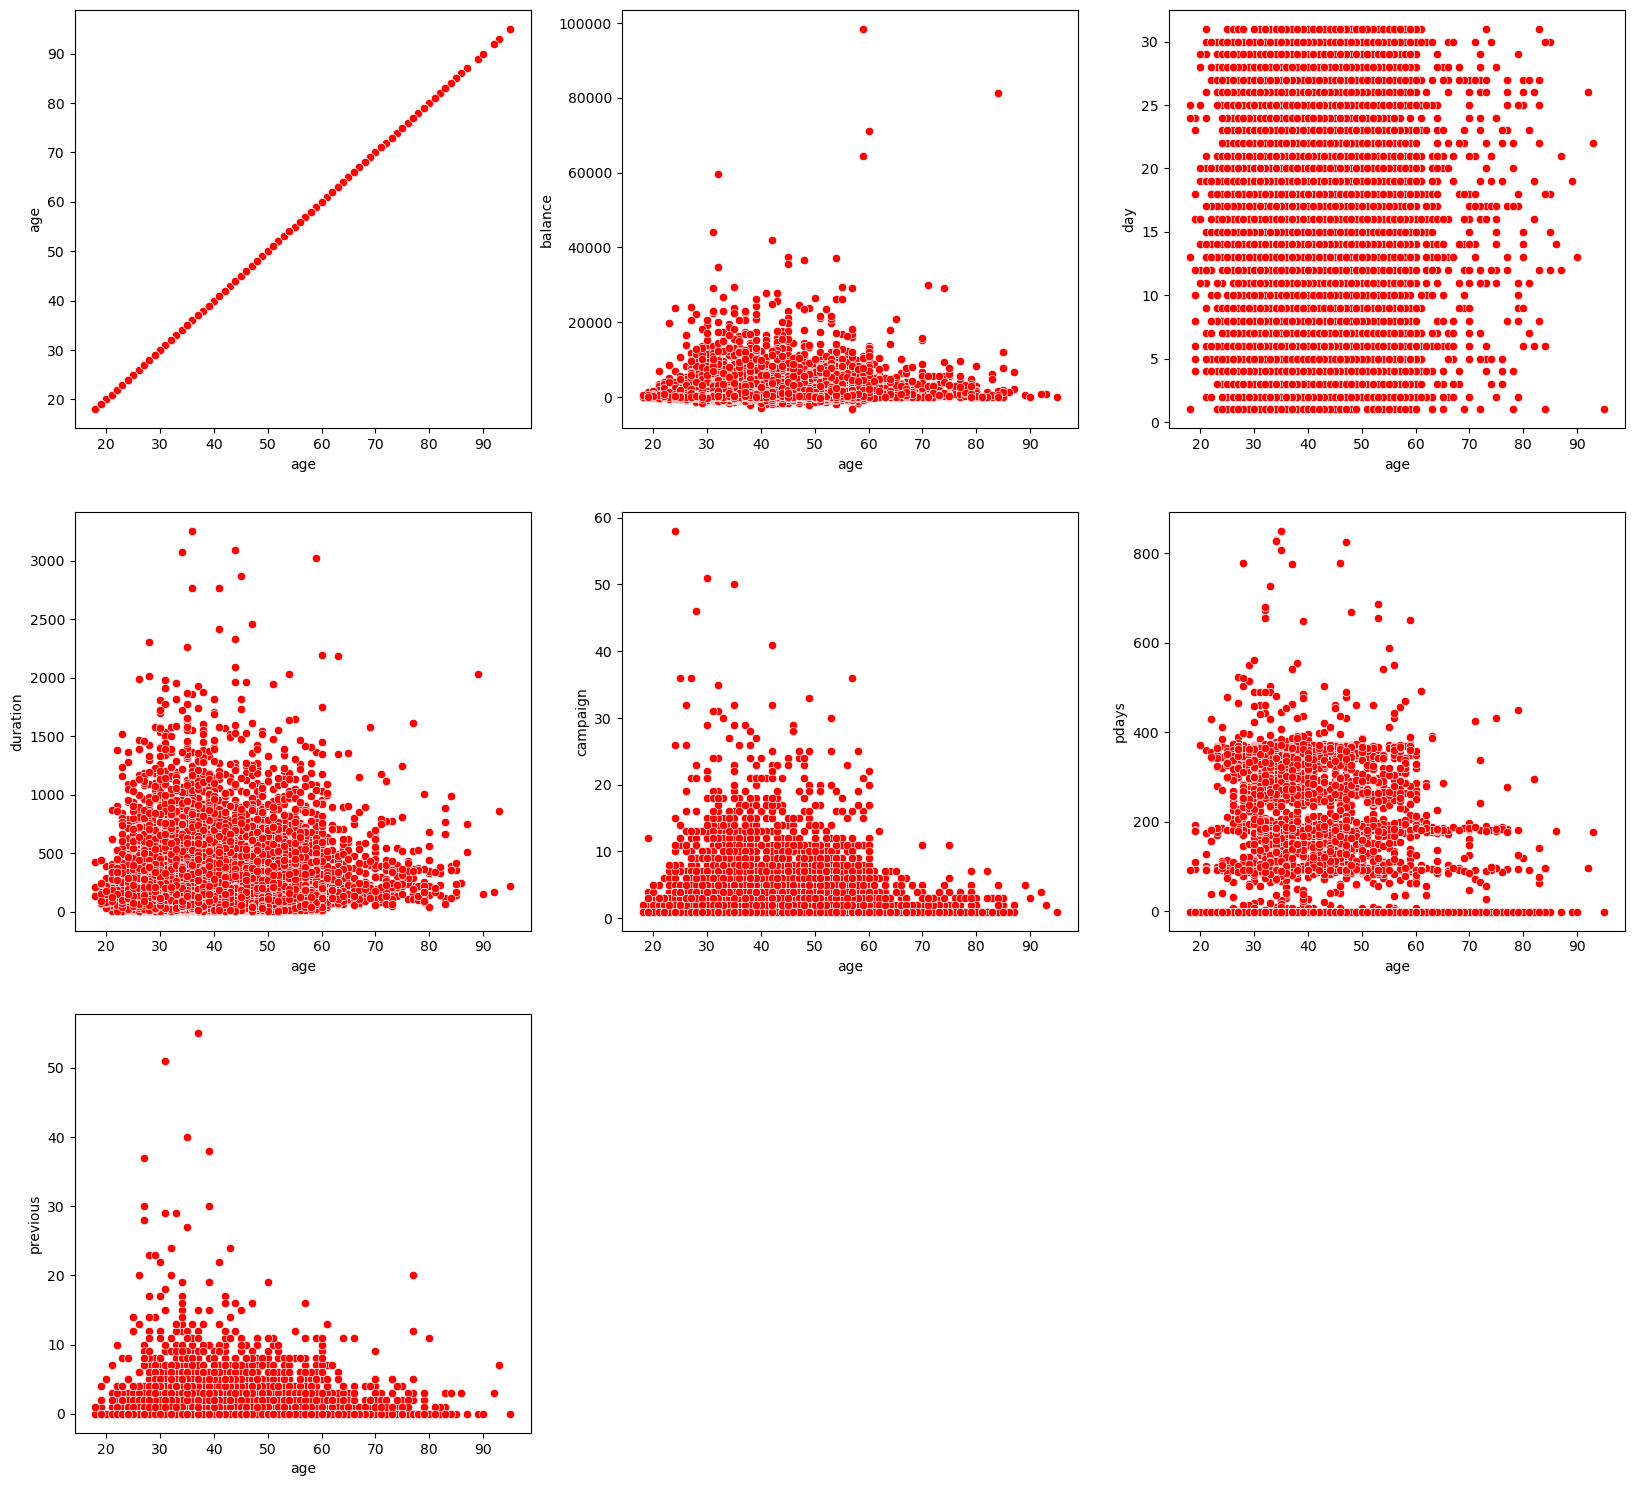

In [152]:
plt.figure(figsize=(20,25))
p=1
for i in numerical_col1:
    if p<=17:
        plt.subplot(4,3,p)
        sns.scatterplot(x='age',y=i,data=df2,color='r')
        plt.xlabel('age')
        plt.ylabel(i)
    p+=1
plt.show()

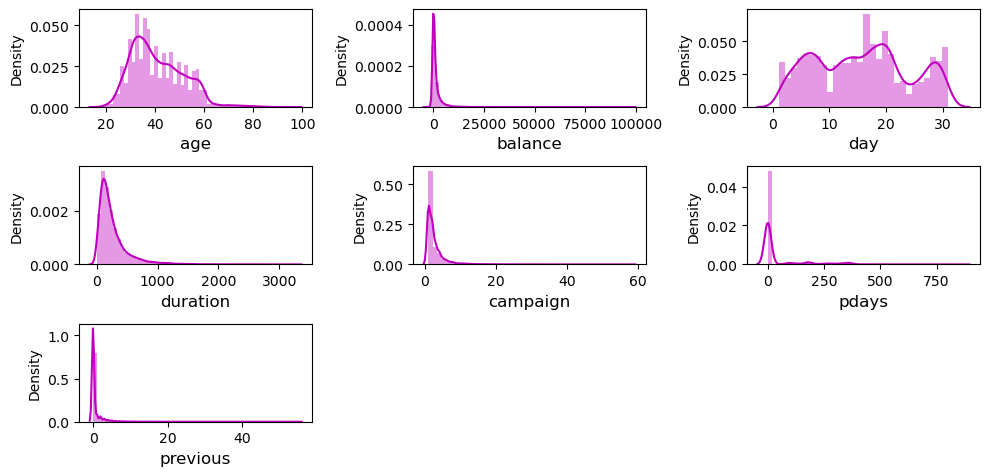

In [153]:
plt.figure(figsize=(10,6),facecolor='white')
plotnumber =1
for col in numerical_col1:
    if plotnumber<=12:
        ax=plt.subplot(4,3,plotnumber) 
        sns.distplot(df2[col],color='m')
        plt.xlabel(col,fontsize=12)
        plt.yticks(rotation=0,fontsize=10)
    plotnumber +=1
plt.tight_layout()

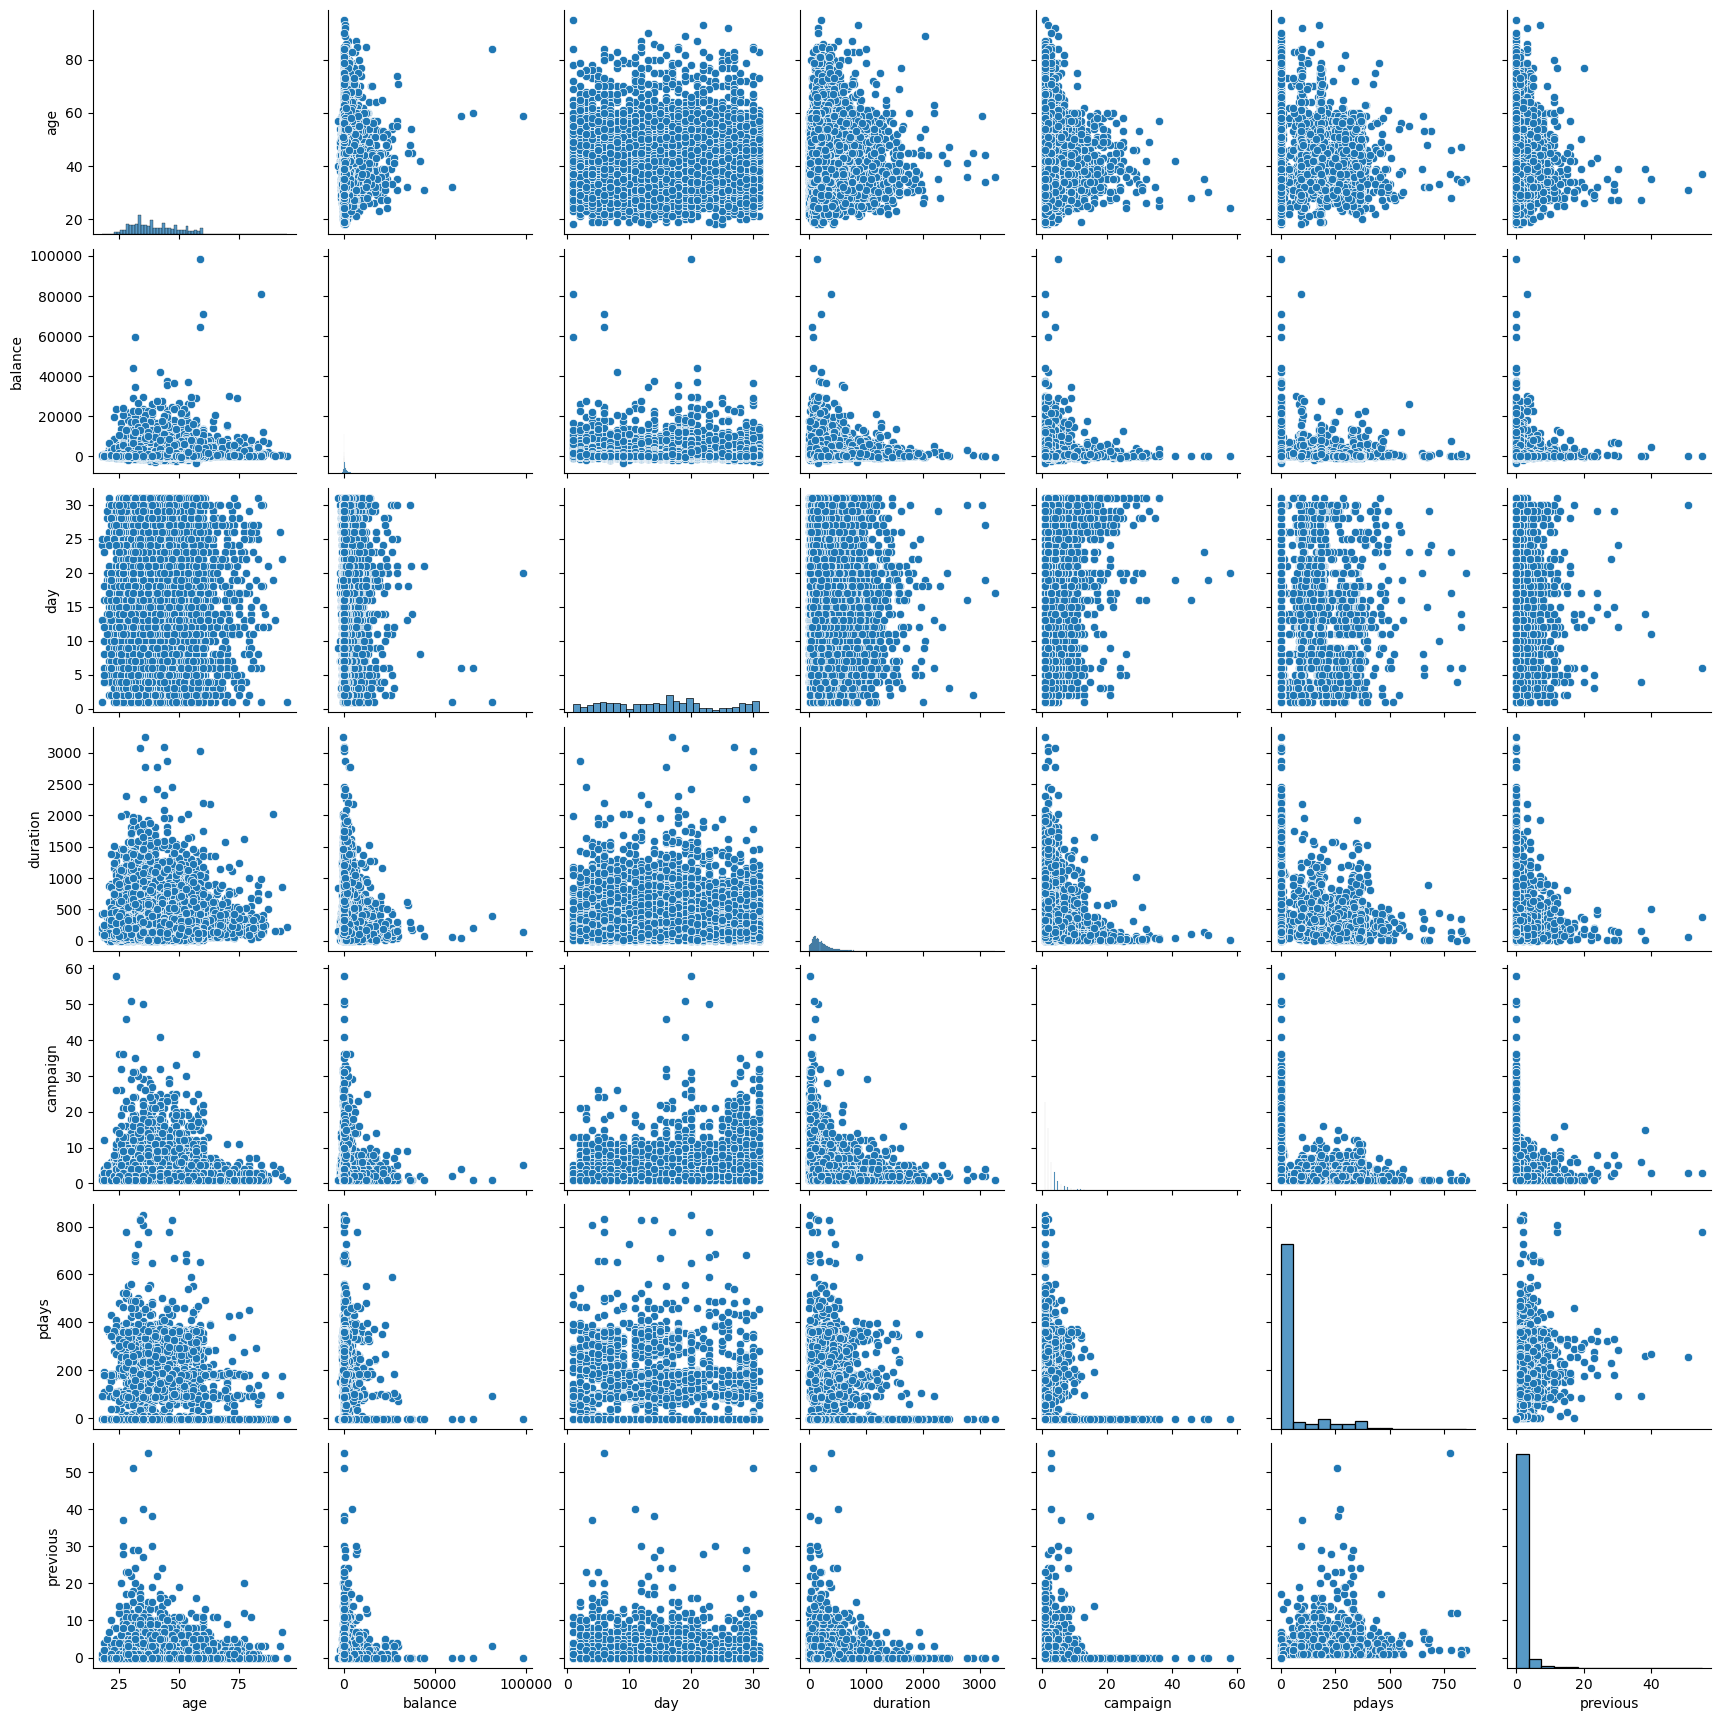

In [154]:
sns.pairplot(df2,palette='Dark2')
plt.show()

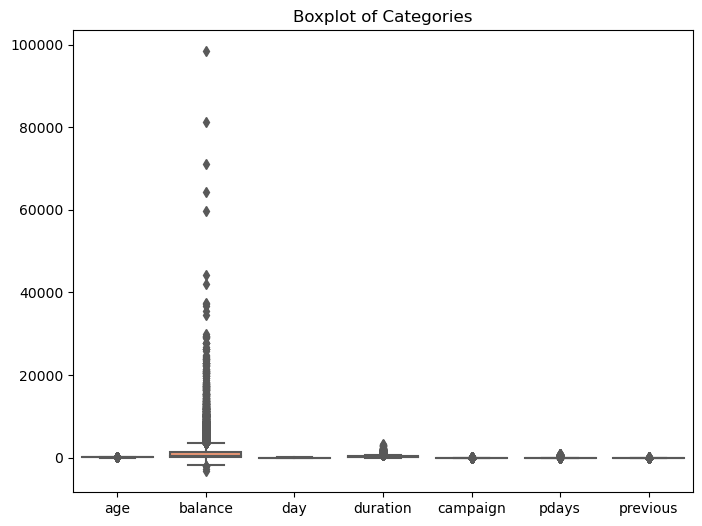

In [155]:
plt.figure(figsize=(8, 6))
sns.boxplot(data=df2, palette='Set2')  
plt.title('Boxplot of Categories')
plt.show()

In [156]:
from scipy.stats import zscore
out_features=df2[['age','balance','duration', 'pdays','campaign']]
z=np.abs(zscore(out_features))
z

age   balance  duration     pdays  campaign
ID                                                     
38441  0.838114  0.402389  0.921849  0.418199  1.058702
40403  3.499987  0.463375  0.439963  0.418199  0.574850
3709   0.932421  0.393955  1.616074  0.418199  0.574850
37422  1.519549  0.784508  0.747754  0.418199  0.248140
12527  0.387871  0.669352  0.569789  0.418199  0.574850
...         ...       ...       ...       ...       ...
23465  0.177969  0.426069  0.426644  0.418199  0.405281
11743  1.236630  0.299239  0.387957  0.418199  0.574850
28292  0.555195  0.348218  0.473070  0.418199  0.574850
45163  1.121034  0.290155  0.194517  0.483926  0.248140
34839  1.121034  0.440017  0.312293  3.141273  0.574850

[13564 rows x 5 columns]

In [157]:
np.where(z>3)

(array([    1,     9,    14, ..., 13550, 13555, 13563], dtype=int64),
 array([0, 3, 1, ..., 2, 4, 3], dtype=int64))

In [158]:
df3=df2[(z<3).all(axis=1)]
df3.shape

(12240, 16)

In [160]:
print('old dataframe:', df2.shape[0])
print('new dataframe:', df3.shape[0])

old dataframe: 13564
new dataframe: 12240


In [161]:
print('Data loss percentage:', ((df2.shape[0]-df3.shape[0])/df2.shape[0])*100)

Data loss percentage: 9.761132409318785


In [162]:
df2=df3

In [163]:
df2.skew()

age         0.438940
balance     2.467760
day         0.105697
duration    1.578271
campaign    1.950305
pdays       2.562038
previous    8.288621
dtype: float64

In [166]:
df2['balance']=np.cbrt(df2['balance'])

In [167]:
df2['duration']=np.cbrt(df2['duration'])
df2['campaign']=np.cbrt(df2['campaign'])
df2['pdays']=np.cbrt(df2['pdays'])
df2['previous']=np.cbrt(df2['previous'])

In [168]:
df2.skew()

age         0.438940
balance    -0.416284
day         0.105697
duration    0.285201
campaign    0.957241
pdays       1.950689
previous    2.253073
dtype: float64

In [169]:
from sklearn.preprocessing import OrdinalEncoder
OE=OrdinalEncoder()
for i in df2.columns:
    if df2[i].dtypes=='object':
        df2[i]=OE.fit_transform(df2[i].values.reshape(-1,1))

df2

age  job  marital  education  default    balance  housing  loan  \
ID                                                                       
38441   32  7.0      1.0        1.0      0.0   4.904868      1.0   0.0   
3709    31  6.0      2.0        2.0      0.0   5.241483      1.0   0.0   
37422   57  7.0      2.0        0.0      0.0  15.573360      1.0   0.0   
12527   45  1.0      0.0        1.0      0.0  -8.900130      0.0   1.0   
16013   32  4.0      2.0        2.0      0.0   0.000000      1.0   0.0   
...    ...  ...      ...        ...      ...        ...      ...   ...   
35237   32  9.0      2.0        1.0      0.0   5.052774      1.0   0.0   
23465   39  4.0      1.0        2.0      0.0   3.556893      0.0   0.0   
11743   54  1.0      1.0        0.0      0.0  13.163613      1.0   0.0   
28292   35  5.0      1.0        0.0      0.0   6.580844      1.0   0.0   
45163   29  0.0      2.0        1.0      0.0   7.741753      0.0   0.0   

       contact  day  month  duration  campaign     pdays  previous  poutcome  
ID                                                                            
38441      0.0   15    8.0  2.714418  1.817121 -1.000000   0.00000       3.0  
3709       2.0   16    8.0  8.776383  1.000000 -1.000000   0.00000       3.0  
37422      1.0   13    8.0  4.020726  1.259921 -1.000000   0.00000       3.0  
12527      2.0    3    5.0  4.805896  1.000000 -1.000000   0.00000       3.0  
16013      0.0   22    5.0  7.691372  1.259921 -1.000000   0.00000       3.0  
...        ...  ...    ...       ...       ...       ...       ...       ...  
35237      0.0    7    8.0  5.972093  1.000000 -1.000000   0.00000       3.0  
23465      0.0   28    1.0  5.289572  1.587401 -1.000000   0.00000       3.0  
11743      2.0   20    6.0  5.406120  1.000000 -1.000000   0.00000       3.0  
28292      0.0   29    4.0  5.142563  1.000000 -1.000000   0.00000       3.0  
45163      0.0    9    9.0  5.924992  1.259921  4.497941   1.44225       2.0  

[12240 rows x 16 columns]

In [173]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12240 entries, 38441 to 45163
Data columns (total 16 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   age        12240 non-null  int64  
 1   job        12240 non-null  float64
 2   marital    12240 non-null  float64
 3   education  12240 non-null  float64
 4   default    12240 non-null  float64
 5   balance    12240 non-null  float64
 6   housing    12240 non-null  float64
 7   loan       12240 non-null  float64
 8   contact    12240 non-null  float64
 9   day        12240 non-null  int64  
 10  month      12240 non-null  float64
 11  duration   12240 non-null  float64
 12  campaign   12240 non-null  float64
 13  pdays      12240 non-null  float64
 14  previous   12240 non-null  float64
 15  poutcome   12240 non-null  float64
dtypes: float64(14), int64(2)
memory usage: 1.6 MB


In [174]:
df2.describe()

age           job       marital     education       default  \
count  12240.000000  12240.000000  12240.000000  12240.000000  12240.000000   
mean      40.657761      4.361683      1.167974      1.222876      0.017484   
std       10.112487      3.283533      0.609498      0.740547      0.131070   
min       18.000000      0.000000      0.000000      0.000000      0.000000   
25%       33.000000      1.000000      1.000000      1.000000      0.000000   
50%       39.000000      4.000000      1.000000      1.000000      0.000000   
75%       48.000000      7.000000      2.000000      2.000000      0.000000   
max       72.000000     11.000000      2.000000      3.000000      1.000000   

            balance       housing          loan       contact           day  \
count  12240.000000  12240.000000  12240.000000  12240.000000  12240.000000   
mean       7.168061      0.554739      0.159804      0.650735     15.678350   
std        6.176591      0.497015      0.366439      0.906076      8.295697   
min      -14.907580      0.000000      0.000000      0.000000      1.000000   
25%        4.061548      0.000000      0.000000      0.000000      8.000000   
50%        7.547842      1.000000      0.000000      0.000000     16.000000   
75%       11.033643      1.000000      0.000000      2.000000     21.000000   
max       21.964129      1.000000      1.000000      2.000000     31.000000   

              month      duration      campaign         pdays      previous  \
count  12240.000000  12240.000000  12240.000000  12240.000000  12240.000000   
mean       5.470261      5.768738      1.278564      0.060692      0.221325   
std        2.997823      1.577371      0.292913      2.460825      0.528550   
min        0.000000      0.000000      1.000000     -1.000000      0.000000   
25%        3.000000      4.687548      1.000000     -1.000000      0.000000   
50%        6.000000      5.625226      1.259921     -1.000000      0.000000   
75%        8.000000      6.745997      1.442250     -1.000000      0.000000   
max       11.000000     10.105549      2.223980      7.027106      3.708430   

           poutcome  
count  12240.000000  
mean       2.614052  
std        0.937058  
min        0.000000  
25%        3.000000  
50%        3.000000  
75%        3.000000  
max        3.000000

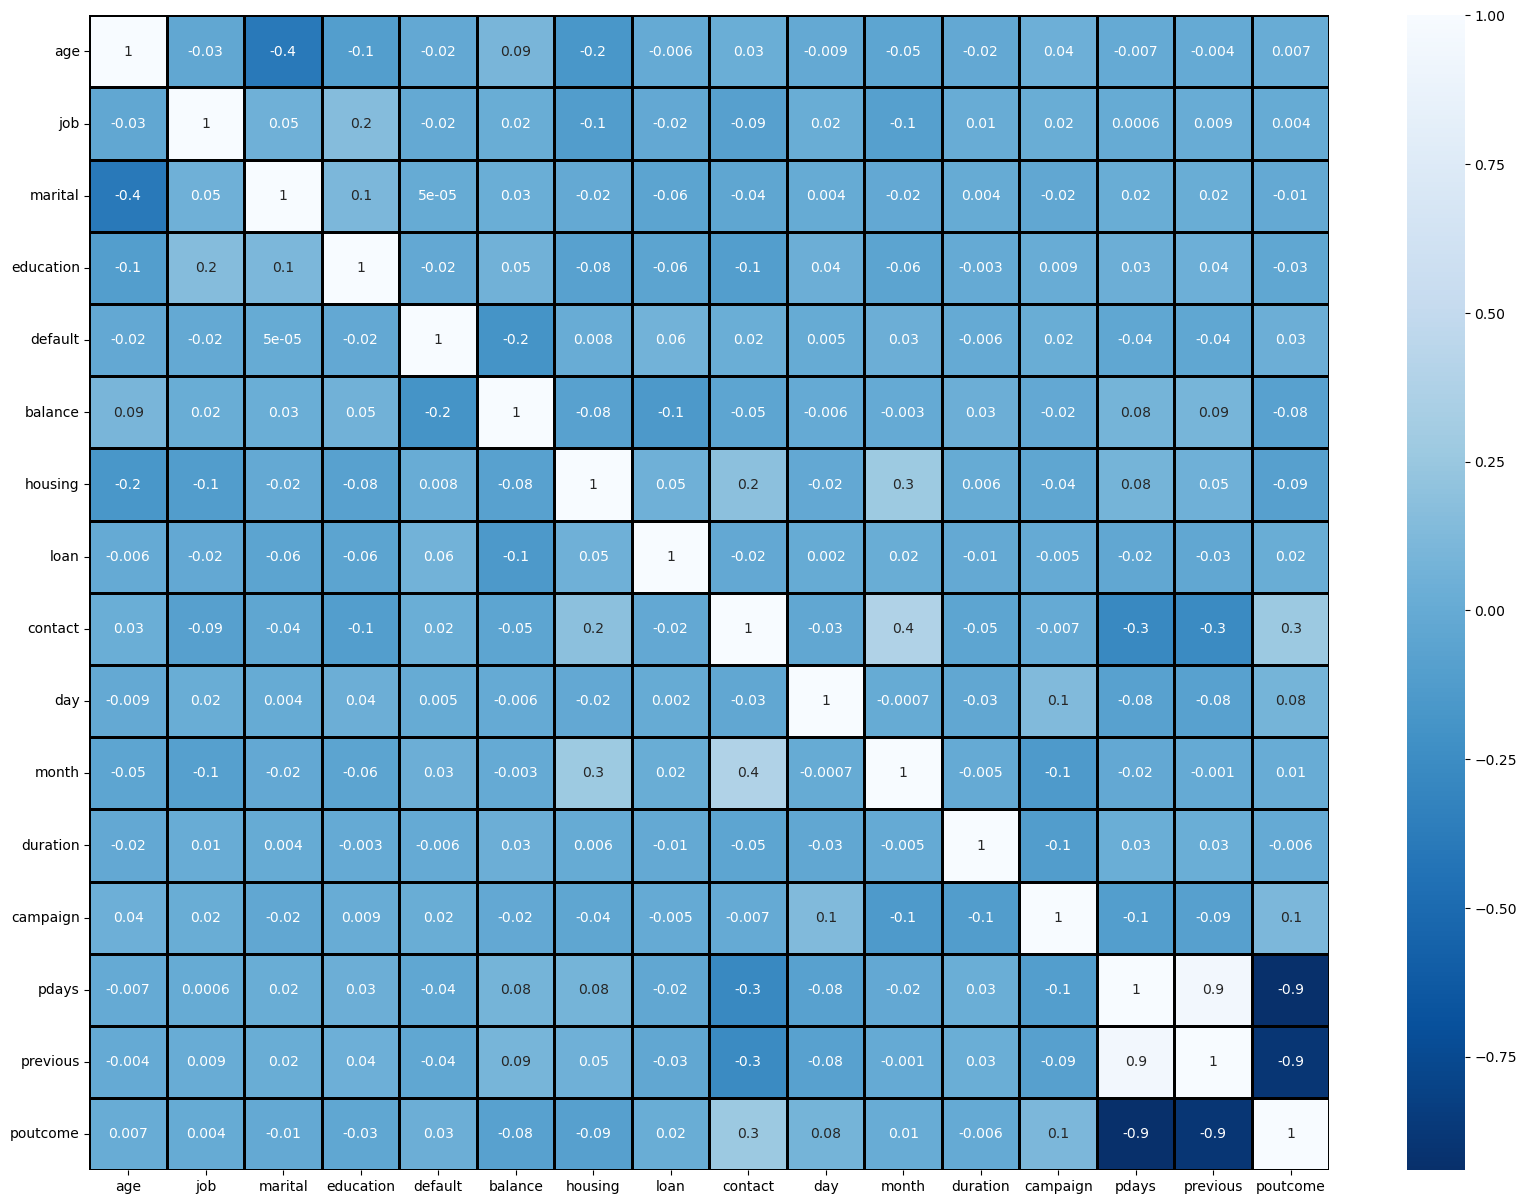

In [175]:
plt.figure(figsize=(20,15))
sns.heatmap(df2.corr(),linewidths=0-1,fmt='.1g',linecolor='black', annot=True,cmap='Blues_r')
plt.yticks(rotation=0)
plt.show()

In [177]:
cor=df2.corr()
cor

age       job   marital  education   default   balance  \
age        1.000000 -0.025862 -0.402136  -0.114619 -0.021314  0.092038   
job       -0.025862  1.000000  0.048354   0.153940 -0.015074  0.019325   
marital   -0.402136  0.048354  1.000000   0.112734  0.000055  0.028760   
education -0.114619  0.153940  0.112734   1.000000 -0.020788  0.052529   
default   -0.021314 -0.015074  0.000055  -0.020788  1.000000 -0.191673   
balance    0.092038  0.019325  0.028760   0.052529 -0.191673  1.000000   
housing   -0.170014 -0.122153 -0.015520  -0.081987  0.007884 -0.082747   
loan      -0.006076 -0.020606 -0.060566  -0.057793  0.062607 -0.146651   
contact    0.027652 -0.090650 -0.039490  -0.112783  0.022527 -0.046867   
day       -0.008506  0.020535  0.003964   0.035038  0.004797 -0.005786   
month     -0.049163 -0.095812 -0.016405  -0.057042  0.033139 -0.003162   
duration  -0.017331  0.010213  0.003684  -0.003017 -0.005809  0.031104   
campaign   0.037778  0.020343 -0.024851   0.009282  0.015871 -0.022575   
pdays     -0.006758  0.000625  0.018474   0.031542 -0.038336  0.082472   
previous  -0.003943  0.008680  0.021822   0.040229 -0.037432  0.089485   
poutcome   0.006866  0.003813 -0.012803  -0.031218  0.034987 -0.078125   

            housing      loan   contact       day     month  duration  \
age       -0.170014 -0.006076  0.027652 -0.008506 -0.049163 -0.017331   
job       -0.122153 -0.020606 -0.090650  0.020535 -0.095812  0.010213   
marital   -0.015520 -0.060566 -0.039490  0.003964 -0.016405  0.003684   
education -0.081987 -0.057793 -0.112783  0.035038 -0.057042 -0.003017   
default    0.007884  0.062607  0.022527  0.004797  0.033139 -0.005809   
balance   -0.082747 -0.146651 -0.046867 -0.005786 -0.003162  0.031104   
housing    1.000000  0.050664  0.184611 -0.022690  0.269852  0.006335   
loan       0.050664  1.000000 -0.017678  0.002154  0.019202 -0.012272   
contact    0.184611 -0.017678  1.000000 -0.027828  0.378543 -0.053076   
day       -0.022690  0.002154 -0.027828  1.000000 -0.000695 -0.025497   
month      0.269852  0.019202  0.378543 -0.000695  1.000000 -0.004742   
duration   0.006335 -0.012272 -0.053076 -0.025497 -0.004742  1.000000   
campaign  -0.041102 -0.004729 -0.006734  0.128146 -0.140879 -0.115138   
pdays      0.078075 -0.024424 -0.275609 -0.084140 -0.016851  0.028366   
previous   0.051035 -0.025005 -0.264725 -0.077633 -0.001199  0.028831   
poutcome  -0.090247  0.015684  0.263685  0.075946  0.010370 -0.005631   

           campaign     pdays  previous  poutcome  
age        0.037778 -0.006758 -0.003943  0.006866  
job        0.020343  0.000625  0.008680  0.003813  
marital   -0.024851  0.018474  0.021822 -0.012803  
education  0.009282  0.031542  0.040229 -0.031218  
default    0.015871 -0.038336 -0.037432  0.034987  
balance   -0.022575  0.082472  0.089485 -0.078125  
housing   -0.041102  0.078075  0.051035 -0.090247  
loan      -0.004729 -0.024424 -0.025005  0.015684  
contact   -0.006734 -0.275609 -0.264725  0.263685  
day        0.128146 -0.084140 -0.077633  0.075946  
month     -0.140879 -0.016851 -0.001199  0.010370  
duration  -0.115138  0.028366  0.028831 -0.005631  
campaign   1.000000 -0.109743 -0.087755  0.106974  
pdays     -0.109743  1.000000  0.941002 -0.941115  
previous  -0.087755  0.941002  1.000000 -0.894671  
poutcome   0.106974 -0.941115 -0.894671  1.000000

In [178]:
df2.drop('age',axis=1,inplace=True)

In [179]:
k=df2

In [180]:
from sklearn.preprocessing import StandardScaler
Scaler=StandardScaler()
k=pd.DataFrame(Scaler.fit_transform(k),columns=k.columns)
k

job   marital  education   default   balance   housing      loan  \
0      0.803532 -0.275605  -0.300973 -0.133397 -0.366429  0.895908 -0.436117   
1      0.498970  1.365155   1.049434 -0.133397 -0.311929  0.895908 -0.436117   
2      0.803532  1.365155  -1.651381 -0.133397  1.360887  0.895908 -0.436117   
3     -1.023843 -1.916365  -0.300973 -0.133397 -2.601572 -1.116186  2.292961   
4     -0.110155  1.365155   1.049434 -0.133397 -1.160568  0.895908 -0.436117   
...         ...       ...        ...       ...       ...       ...       ...   
12235  1.412657  1.365155  -0.300973 -0.133397 -0.342482  0.895908 -0.436117   
12236 -0.110155 -0.275605   1.049434 -0.133397 -0.584678 -1.116186 -0.436117   
12237 -1.023843 -0.275605  -1.651381 -0.133397  0.970729  0.895908 -0.436117   
12238  0.194407 -0.275605  -1.651381 -0.133397 -0.095075  0.895908 -0.436117   
12239 -1.328405  1.365155  -0.300973 -0.133397  0.092886 -1.116186 -0.436117   

        contact       day     month  duration  campaign     pdays  previous  \
0     -0.718220 -0.081775  0.843893 -1.936415  1.838698 -0.431049 -0.418756   
1      1.489191  0.038775  0.843893  1.906823 -0.951049 -0.431049 -0.418756   
2      0.385485 -0.322873  0.843893 -1.108226 -0.063648 -0.431049 -0.418756   
3      1.489191 -1.528367 -0.156874 -0.610435 -0.951049 -0.431049 -0.418756   
4     -0.718220  0.762071 -0.156874  1.218934 -0.063648 -0.431049 -0.418756   
...         ...       ...       ...       ...       ...       ...       ...   
12235 -0.718220 -1.046169  0.843893  0.128925 -0.951049 -0.431049 -0.418756   
12236 -0.718220  1.485367 -1.491230 -0.303787  1.054408 -0.431049 -0.418756   
12237  1.489191  0.520972  0.176715 -0.229897 -0.951049 -0.431049 -0.418756   
12238 -0.718220  1.605916 -0.490463 -0.396990 -0.951049 -0.431049 -0.418756   
12239 -0.718220 -0.805071  1.177482  0.099064 -0.063648  1.803229  2.310045   

       poutcome  
0      0.411889  
1      0.411889  
2      0.411889  
3      0.411889  
4      0.411889  
...         ...  
12235  0.411889  
12236  0.411889  
12237  0.411889  
12238  0.411889  
12239 -0.655325  

[12240 rows x 15 columns]

In [181]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif=pd.DataFrame()
vif['VIF values']=[variance_inflation_factor(k.values,i) for i in range(len(k.columns))]
vif['feature']=k.columns
vif

VIF values    feature
0     1.044226        job
1     1.018943    marital
2     1.053787  education
3     1.041864    default
4     1.075979    balance
5     1.136156    housing
6     1.033264       loan
7     1.319650    contact
8     1.027290        day
9     1.271009      month
10    1.022443   duration
11    1.067858   campaign
12   15.527766      pdays
13    8.918813   previous
14    8.884792   poutcome

In [186]:
vif=pd.DataFrame()
vif['VIF values']=[variance_inflation_factor(df2.values,i) for i in range(len(df2.columns))]
vif['feature']=df2.columns
vif

VIF values    feature
0     2.853219        job
1     4.614294    marital
2     3.857201  education
3     1.059858    default
4     2.488535    balance
5     2.479916    housing
6     1.220310       loan
7     1.996095    contact
8     4.616314        day
9     5.306383      month
10   12.528657   duration
11   16.992180   campaign
12    3.731013   previous
13   25.711853   poutcome

In [189]:
k=df2

In [188]:
model=joblib.load('bank marketing.pkl')


In [191]:
prediction=model.predict(k)
prediction

array([0., 0., 0., ..., 0., 0., 0.])